Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interest on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year.

Dependent variable - No need to create any new variable, as the 'Default' variable is already provided in the dataset, which can be considered as the dependent variable.

Test Train Split - Split the data into train and test datasets in the ratio of 67:33 and use a random state of 42 (random_state=42). Model building is to be done on the train dataset and model validation is to be done on the test dataset.

In [ ]:
##
##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




## lets bring in the dataset


In [ ]:
##
##

from google.colab import files
uploaded = files.upload()

Saving CompData-1.xlsx to CompData-1.xlsx


## lets read the dataset and see an overview

In [ ]:
##
## reading the dataframe

comp1 = pd.read_excel('CompData-1.xlsx')
comp1.head()

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00         0.462045   
1                            4.230000e+09         0.460116   
2                            8.150000e+08         0.449893   
3                            0.000000e+00         0.462731   
4                            0.000000e+00         0.463117   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                              0.000352     0.001417              0.322558   
1                              0.000716     0.000000              0.315520   
2                              0.000496     0.000000              0.299851   
3                              0.000592     0.009313              0.319834   
4                              0.000782     0.400243              0.325104   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                0.194472   
1                                0.161633   
2                                0.172554   
3                                0.174738   
4                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.022074  ...              0.310901   
1                                  0.021902  ...              0.314572   
2                                  0.022186  ...              0.314777   
3                                  0.027638  ...              0.316974   
4                                  0.022072  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 58 columns]

In [ ]:
##
##

comp1.tail()

Co_Code           Co_Name  _Operating_Expense_Rate  \
2053     2743  Kothari Ferment.             3.021580e-04   
2054    21216    Firstobj.Tech.             1.371450e-04   
2055      142  Diamines & Chem.             2.114990e-04   
2056    18014       IL&FS Engg.             3.750000e+09   
2057    43229      Channel Nine             2.981110e-04   

      _Research_and_development_expense_rate  _Cash_flow_rate  \
2053                            6.490000e+09         0.477066   
2054                            0.000000e+00         0.465211   
2055                            8.370000e+09         0.480248   
2056                            0.000000e+00         0.474670   
2057                            0.000000e+00         0.467203   

      _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
2053                              0.000000     0.183014              0.322063   
2054                              0.000658     0.000000              0.319764   
2055                              0.000502     0.000000              0.327828   
2056                              0.000578     0.306205              0.322027   
2057                              0.000826     0.000000              0.330021   

      _Per_Share_Net_profit_before_tax_Yuan_  \
2053                                0.192739   
2054                                0.169391   
2055                                0.155005   
2056                                0.173834   
2057                                0.180236   

      _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
2053                                  0.022127  ...              0.320387   
2054                                  0.022072  ...              0.312324   
2055                                  0.021861  ...              0.313122   
2056                                  0.022167  ...              0.315632   
2057                                  0.022418  ...              0.316734   

      _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
2053                              0.004430                       0   
2054                              0.032284                       0   
2055                              0.040998                       0   
2056                              0.020275                       0   
2057                              0.031368                       0   

      _Total_assets_to_GNP_price  _No_credit_Interval  \
2053                    0.000420             0.624567   
2054                    0.000882             0.624008   
2055                    0.009579             0.623718   
2056                    0.004958             0.623443   
2057                    0.000186             0.623588   

      _Degree_of_Financial_Leverage_DFL  \
2053                           0.026791   
2054                           0.024201   
2055                           0.026702   
2056                           0.026943   
2057                           0.026871   

      _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
2053                                           0.565158                 1   
2054                                           0.573670                 1   
2055                                           0.564697                 1   
2056                                           0.565792                 1   
2057                                           0.565512                 1   

      _Equity_to_Liability  Default  
2053              0.171662        0  
2054              0.053740        0  
2055              0.054984        0  
2056              0.057553        0  
2057              0.020266        0  

[5 rows x 58 columns]

In [ ]:
##
##

comp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [ ]:
##
##

comp1.describe().T

count          mean  \
Co_Code                                            2058.0  1.757211e+04   
_Operating_Expense_Rate                            2058.0  2.052389e+09   
_Research_and_development_expense_rate             2058.0  1.208634e+09   
_Cash_flow_rate                                    2058.0  4.652426e-01   
_Interest_bearing_debt_interest_rate               2058.0  1.113022e+07   
_Tax_rate_A                                        2058.0  1.147770e-01   
_Cash_Flow_Per_Share                               1891.0  3.199856e-01   
_Per_Share_Net_profit_before_tax_Yuan_             2058.0  1.769673e-01   
_Realized_Sales_Gross_Profit_Growth_Rate           2058.0  2.276117e-02   
_Operating_Profit_Growth_Rate                      2058.0  8.481083e-01   
_Continuous_Net_Profit_Growth_Rate                 2058.0  2.173915e-01   
_Total_Asset_Growth_Rate                           2058.0  5.287663e+09   
_Net_Value_Growth_Rate                             2058.0  5.189504e+06   
_Total_Asset_Return_Growth_Rate_Ratio              2058.0  2.641004e-01   
_Cash_Reinvestment_perc                            2058.0  3.771970e-01   
_Current_Ratio                                     2058.0  1.336249e+06   
_Quick_Ratio                                       2058.0  2.775510e+07   
_Interest_Expense_Ratio                            2058.0  6.312913e-01   
_Total_debt_to_Total_net_worth                     2037.0  1.071429e+07   
_Long_term_fund_suitability_ratio_A                2058.0  8.973310e-03   
_Net_profit_before_tax_to_Paid_in_capital          2058.0  1.753994e-01   
_Total_Asset_Turnover                              2058.0  1.286405e-01   
_Accounts_Receivable_Turnover                      2058.0  4.159864e+07   
_Average_Collection_Days                           2058.0  2.629786e+07   
_Inventory_Turnover_Rate_times                     2058.0  2.030227e+09   
_Fixed_Assets_Turnover_Frequency                   2058.0  1.230898e+09   
_Net_Worth_Turnover_Rate_times                     2058.0  3.957710e-02   
_Operating_profit_per_person                       2058.0  4.036693e-01   
_Allocation_rate_per_person                        2058.0  5.725559e+06   
_Quick_Assets_to_Total_Assets                      2058.0  3.421979e-01   
_Cash_to_Total_Assets                              1962.0  7.993675e-02   
_Quick_Assets_to_Current_Liability                 2058.0  1.190476e+07   
_Cash_to_Current_Liability                         2058.0  9.282507e+07   
_Operating_Funds_to_Liability                      2058.0  3.482338e-01   
_Inventory_to_Working_Capital                      2058.0  2.777491e-01   
_Inventory_to_Current_Liability                    2058.0  5.786346e+07   
_Long_term_Liability_to_Current_Assets             2058.0  7.340107e+07   
_Retained_Earnings_to_Total_Assets                 2058.0  9.303546e-01   
_Total_income_to_Total_expense                     2058.0  2.357977e-03   
_Total_expense_to_Assets                           2058.0  3.109208e-02   
_Current_Asset_Turnover_Rate                       2058.0  1.273303e+09   
_Quick_Asset_Turnover_Rate                         2058.0  2.571768e+09   
_Cash_Turnover_Rate                                2058.0  2.653696e+09   
_Fixed_Assets_to_Assets                            2058.0  4.042760e+06   
_Cash_Flow_to_Total_Assets                         2058.0  6.442325e-01   
_Cash_Flow_to_Liability                            2058.0  4.599747e-01   
_CFO_to_Assets                                     2058.0  5.797344e-01   
_Cash_Flow_to_Equity                               2058.0  3.146292e-01   
_Current_Liability_to_Current_Assets               2044.0  3.935178e-02   
_Liability_Assets_Flag                             2058.0  3.401361e-03   
_Total_assets_to_GNP_price                         2058.0  2.779397e+07   
_No_credit_Interval                                2058.0  6.236856e-01   
_Degree_of_Financial_Leverage_DFL                  2058.0  2.785248e-02   
_I

In [ ]:
##
##

comp1.size

119364

In [ ]:
##
##

comp1.duplicated().sum()

0

## removing features company code(Co_Code) and company name(Co_Name) as they dont serve any purpose.

In [ ]:
##
##

comp2 = comp1.drop(columns = ['Co_Code', 'Co_Name'], axis = 1)
comp2.head()

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
0             8.820000e+09                            0.000000e+00   
1             9.380000e+09                            4.230000e+09   
2             3.800000e+09                            8.150000e+08   
3             6.440000e+09                            0.000000e+00   
4             3.680000e+09                            0.000000e+00   

   _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
0         0.462045                              0.000352     0.001417   
1         0.460116                              0.000716     0.000000   
2         0.449893                              0.000496     0.000000   
3         0.462731                              0.000592     0.009313   
4         0.463117                              0.000782     0.400243   

   _Cash_Flow_Per_Share  _Per_Share_Net_profit_before_tax_Yuan_  \
0              0.322558                                0.194472   
1              0.315520                                0.161633   
2              0.299851                                0.172554   
3              0.319834                                0.174738   
4              0.325104                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  _Operating_Profit_Growth_Rate  \
0                                  0.022074                       0.848021   
1                                  0.021902                       0.839645   
2                                  0.022186                       0.848196   
3                                  0.027638                       0.848391   
4                                  0.022072                       0.847987   

   _Continuous_Net_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                            0.217590  ...              0.310901   
1                            0.217360  ...              0.314572   
2                            0.217573  ...              0.314777   
3                            0.217662  ...              0.316974   
4                            0.217589  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 56 columns]

## Missing value treatment


Text(0.5, 1.0, 'Heatmap for the entire Dataframe')

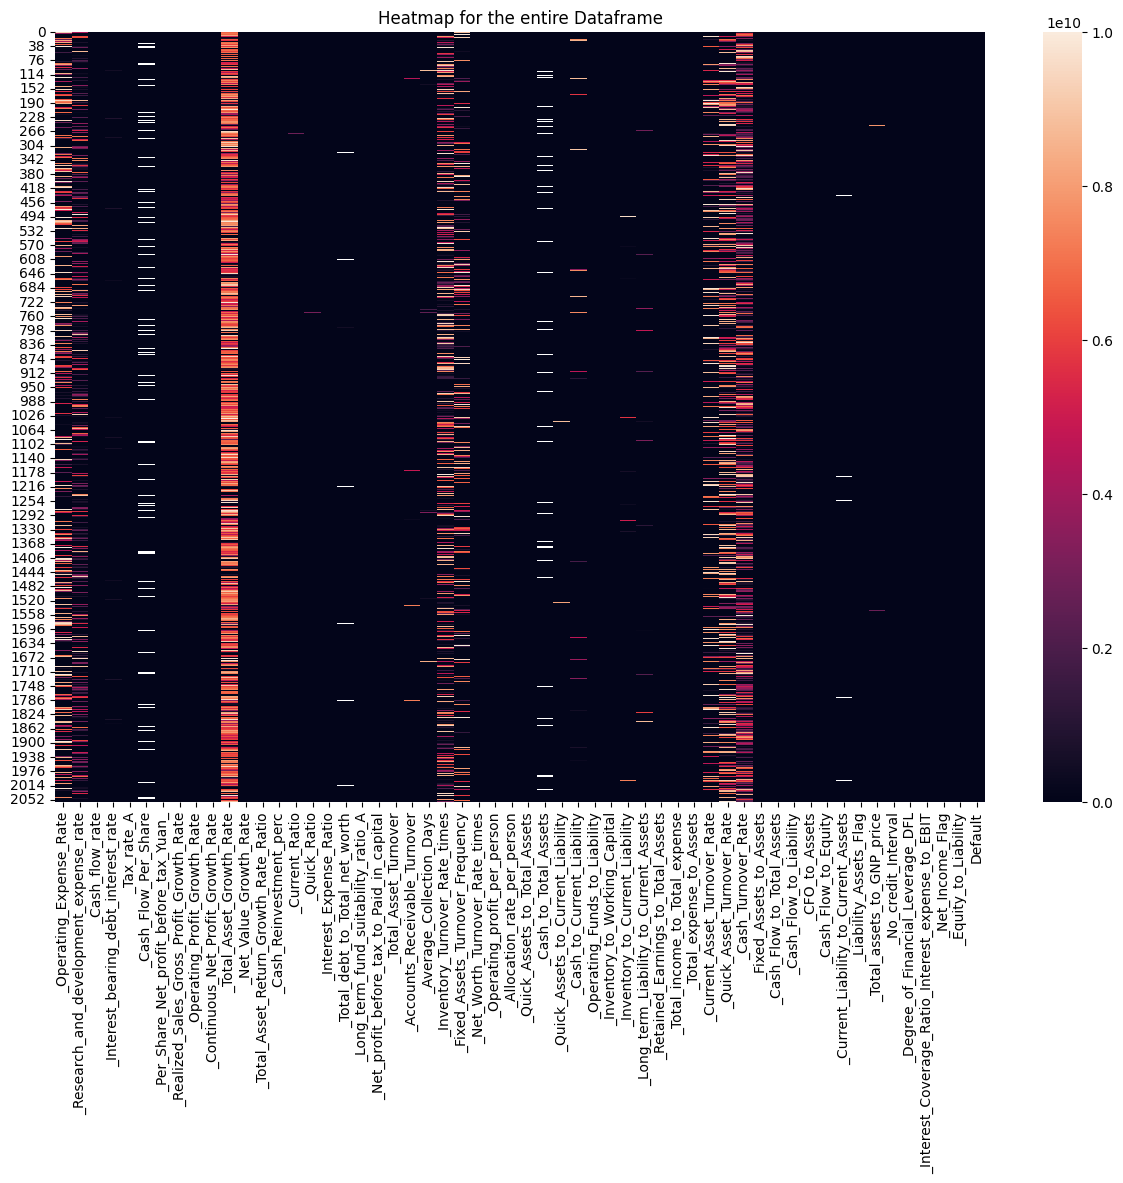

In [ ]:
##
##

plt.figure(figsize = (15, 10))
sns.heatmap(comp2, color = 'red')
plt.title("Heatmap for the entire Dataframe")


## a huge chunk of our dataframe has values that are either zero or less than zero.
## we also see data that is also very high, this means features are not in the same scale


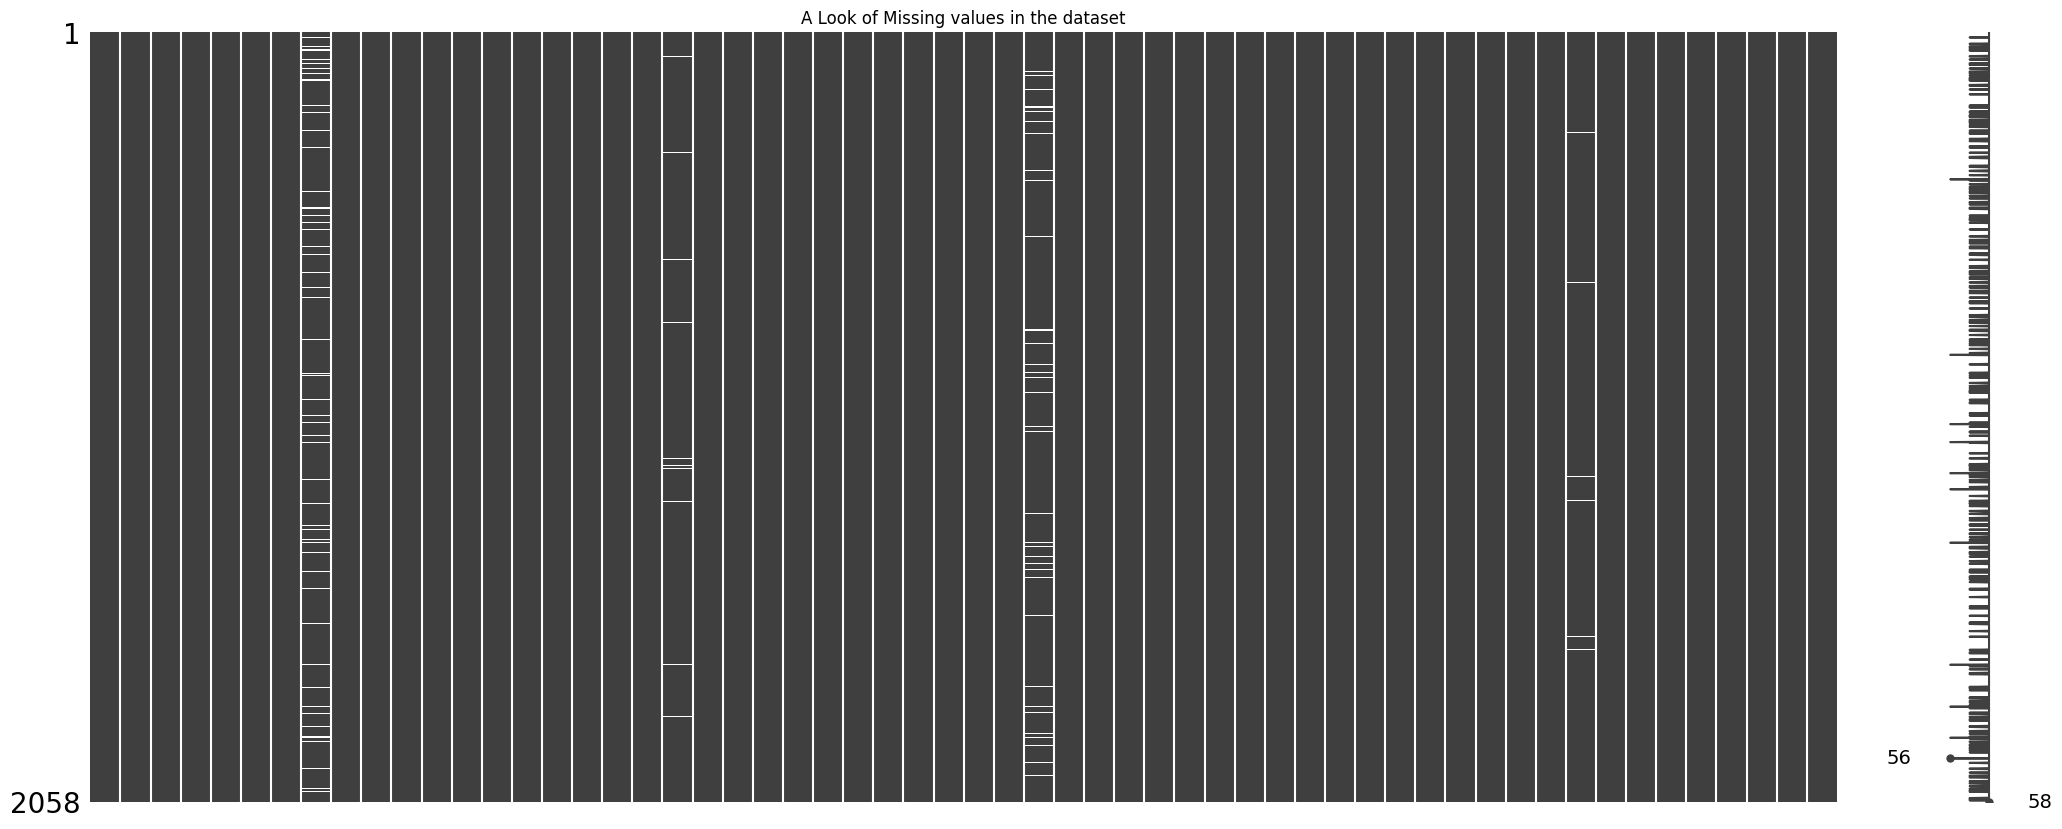

In [ ]:
##
## using missingno library to create plot that shows the null values

import missingno as msno
msno.matrix(comp1)
plt.title("A Look of Missing values in the dataset")
plt.show()


In [ ]:
##
##

comp2.describe().T

## we only have about 4 features that have missing values.
## Since all are numeric we have to find ways to impute them.

count          mean  \
_Operating_Expense_Rate                            2058.0  2.052389e+09   
_Research_and_development_expense_rate             2058.0  1.208634e+09   
_Cash_flow_rate                                    2058.0  4.652426e-01   
_Interest_bearing_debt_interest_rate               2058.0  1.113022e+07   
_Tax_rate_A                                        2058.0  1.147770e-01   
_Cash_Flow_Per_Share                               1891.0  3.199856e-01   
_Per_Share_Net_profit_before_tax_Yuan_             2058.0  1.769673e-01   
_Realized_Sales_Gross_Profit_Growth_Rate           2058.0  2.276117e-02   
_Operating_Profit_Growth_Rate                      2058.0  8.481083e-01   
_Continuous_Net_Profit_Growth_Rate                 2058.0  2.173915e-01   
_Total_Asset_Growth_Rate                           2058.0  5.287663e+09   
_Net_Value_Growth_Rate                             2058.0  5.189504e+06   
_Total_Asset_Return_Growth_Rate_Ratio              2058.0  2.641004e-01   
_Cash_Reinvestment_perc                            2058.0  3.771970e-01   
_Current_Ratio                                     2058.0  1.336249e+06   
_Quick_Ratio                                       2058.0  2.775510e+07   
_Interest_Expense_Ratio                            2058.0  6.312913e-01   
_Total_debt_to_Total_net_worth                     2037.0  1.071429e+07   
_Long_term_fund_suitability_ratio_A                2058.0  8.973310e-03   
_Net_profit_before_tax_to_Paid_in_capital          2058.0  1.753994e-01   
_Total_Asset_Turnover                              2058.0  1.286405e-01   
_Accounts_Receivable_Turnover                      2058.0  4.159864e+07   
_Average_Collection_Days                           2058.0  2.629786e+07   
_Inventory_Turnover_Rate_times                     2058.0  2.030227e+09   
_Fixed_Assets_Turnover_Frequency                   2058.0  1.230898e+09   
_Net_Worth_Turnover_Rate_times                     2058.0  3.957710e-02   
_Operating_profit_per_person                       2058.0  4.036693e-01   
_Allocation_rate_per_person                        2058.0  5.725559e+06   
_Quick_Assets_to_Total_Assets                      2058.0  3.421979e-01   
_Cash_to_Total_Assets                              1962.0  7.993675e-02   
_Quick_Assets_to_Current_Liability                 2058.0  1.190476e+07   
_Cash_to_Current_Liability                         2058.0  9.282507e+07   
_Operating_Funds_to_Liability                      2058.0  3.482338e-01   
_Inventory_to_Working_Capital                      2058.0  2.777491e-01   
_Inventory_to_Current_Liability                    2058.0  5.786346e+07   
_Long_term_Liability_to_Current_Assets             2058.0  7.340107e+07   
_Retained_Earnings_to_Total_Assets                 2058.0  9.303546e-01   
_Total_income_to_Total_expense                     2058.0  2.357977e-03   
_Total_expense_to_Assets                           2058.0  3.109208e-02   
_Current_Asset_Turnover_Rate                       2058.0  1.273303e+09   
_Quick_Asset_Turnover_Rate                         2058.0  2.571768e+09   
_Cash_Turnover_Rate                                2058.0  2.653696e+09   
_Fixed_Assets_to_Assets                            2058.0  4.042760e+06   
_Cash_Flow_to_Total_Assets                         2058.0  6.442325e-01   
_Cash_Flow_to_Liability                            2058.0  4.599747e-01   
_CFO_to_Assets                                     2058.0  5.797344e-01   
_Cash_Flow_to_Equity                               2058.0  3.146292e-01   
_Current_Liability_to_Current_Assets               2044.0  3.935178e-02   
_Liability_Assets_Flag                             2058.0  3.401361e-03   
_Total_assets_to_GNP_price                         2058.0  2.779397e+07   
_No_credit_Interval                                2058.0  6.236856e-01   
_Degree_of_Financial_Leverage_DFL                  2058.0  2.785248e-02   
_Interest_Coverage_Ratio_Interest_expense_to_EBIT  2058.0  5.654355e-01   
_N

In [ ]:
##
## just looking at the features that have null values alone.

comp2[['_Cash_Flow_Per_Share', '_Total_debt_to_Total_net_worth', '_Cash_to_Total_Assets', '_Current_Liability_to_Current_Assets']].describe().T

## for cash flow per share, we can impute it with the mean
## for total debt to total net worth we can impute it with the median
## for the rest we can impute it with the mean.

count          mean           std  \
_Cash_Flow_Per_Share                  1891.0  3.199856e-01  1.529979e-02   
_Total_debt_to_Total_net_worth        2037.0  1.071429e+07  2.696960e+08   
_Cash_to_Total_Assets                 1962.0  7.993675e-02  9.862260e-02   
_Current_Liability_to_Current_Assets  2044.0  3.935178e-02  4.797815e-02   

                                           min       25%       50%       75%  \
_Cash_Flow_Per_Share                  0.169449  0.314989  0.320648  0.325918   
_Total_debt_to_Total_net_worth        0.000000  0.003925  0.007271  0.013069   
_Cash_to_Total_Assets                 0.000184  0.020619  0.045632  0.097713   
_Current_Liability_to_Current_Assets  0.000000  0.021775  0.032652  0.043947   

                                               max  
_Cash_Flow_Per_Share                  4.622268e-01  
_Total_debt_to_Total_net_worth        9.940000e+09  
_Cash_to_Total_Assets                 9.250180e-01  
_Current_Liability_to_Current_Assets  1.000000e+00

In [ ]:
##
## lets use simple imputer and impute the mean and median values for the null values present.

from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy = 'mean')
imputer_median = SimpleImputer(strategy = 'median')

## mean imputation
comp2[['_Cash_Flow_Per_Share']] = imputer_mean.fit_transform(comp2[['_Cash_Flow_Per_Share']])
comp2[['_Cash_to_Total_Assets']] = imputer_mean.fit_transform(comp2[['_Cash_to_Total_Assets']])
comp2[['_Current_Liability_to_Current_Assets']] = imputer_mean.fit_transform(comp2[['_Current_Liability_to_Current_Assets']])

## median imputation
comp2[['_Total_debt_to_Total_net_worth']] = imputer_median.fit_transform(comp2[['_Total_debt_to_Total_net_worth']])



In [ ]:
##
## after image of imputing

comp2[['_Cash_Flow_Per_Share', '_Total_debt_to_Total_net_worth', '_Cash_to_Total_Assets', '_Current_Liability_to_Current_Assets']].describe().T

## only total debt to totnal net worth sees a change, rest all are practically unaffected.

count          mean           std  \
_Cash_Flow_Per_Share                  2058.0  3.199856e-01  1.466558e-02   
_Total_debt_to_Total_net_worth        2058.0  1.060496e+07  2.683180e+08   
_Cash_to_Total_Assets                 2058.0  7.993675e-02  9.629374e-02   
_Current_Liability_to_Current_Assets  2058.0  3.935178e-02  4.781460e-02   

                                           min       25%       50%       75%  \
_Cash_Flow_Per_Share                  0.169449  0.315705  0.319986  0.325387   
_Total_debt_to_Total_net_worth        0.000000  0.003939  0.007271  0.012987   
_Cash_to_Total_Assets                 0.000184  0.021660  0.049367  0.094029   
_Current_Liability_to_Current_Assets  0.000000  0.021885  0.032794  0.043865   

                                               max  
_Cash_Flow_Per_Share                  4.622268e-01  
_Total_debt_to_Total_net_worth        9.940000e+09  
_Cash_to_Total_Assets                 9.250180e-01  
_Current_Liability_to_Current_Assets  1.000000e+00

## Checking outliers

In [ ]:
##
## lets create a function and see if we have outliers in columns that we have here.
## we will create it in such a manner that the plots are quite compact


def to_create_boxplot(columns, name):
    column1 = pd.DataFrame(columns)
    fig, axs = plt.subplots(1, 2)
    plt.figure(figsize = (4, 3))
    axs[0].boxplot(column1)
    axs[0].set_title(f'{name} - boxplot & heatmap')
    sns.heatmap(column1, cmap= 'viridis', ax = axs[1])
    plt.show()



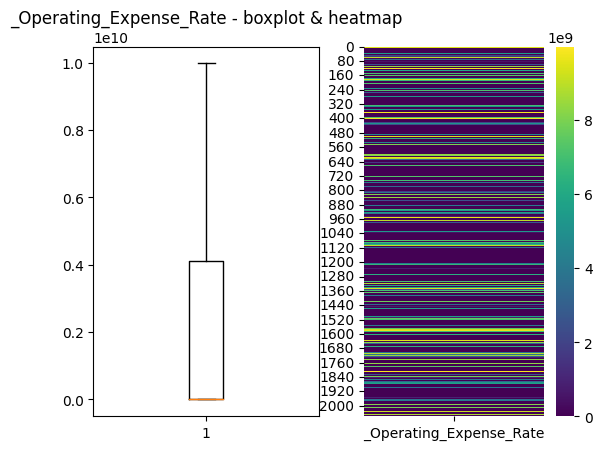

<Figure size 400x300 with 0 Axes>

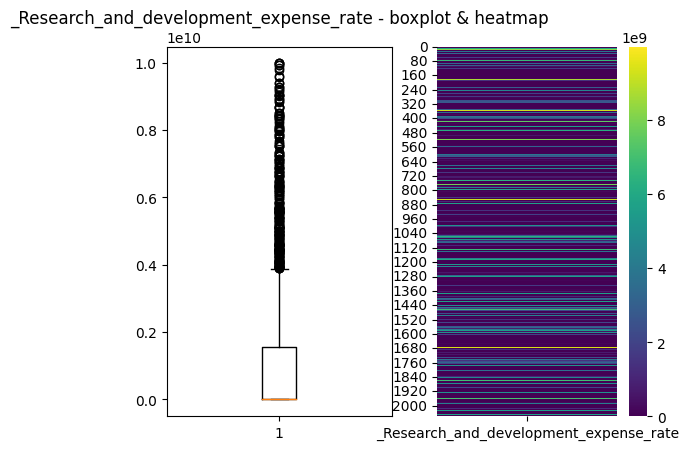

<Figure size 400x300 with 0 Axes>

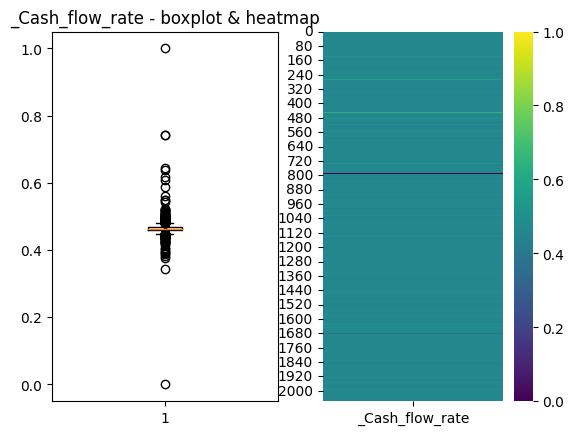

<Figure size 400x300 with 0 Axes>

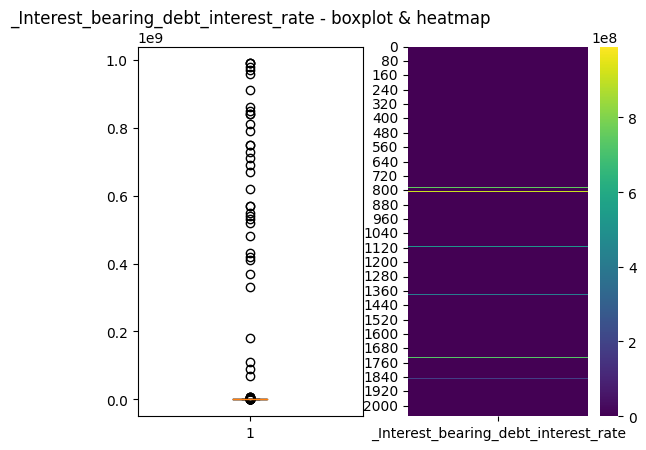

<Figure size 400x300 with 0 Axes>

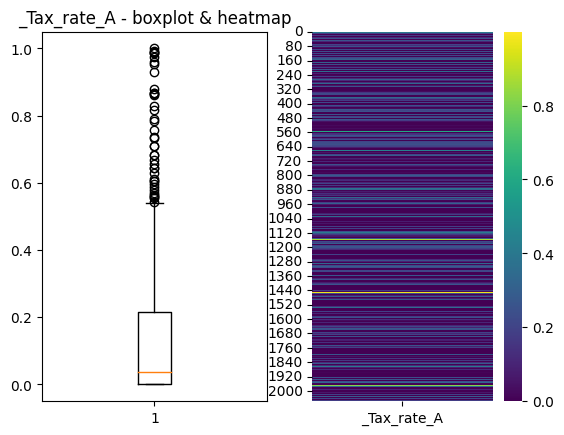

<Figure size 400x300 with 0 Axes>

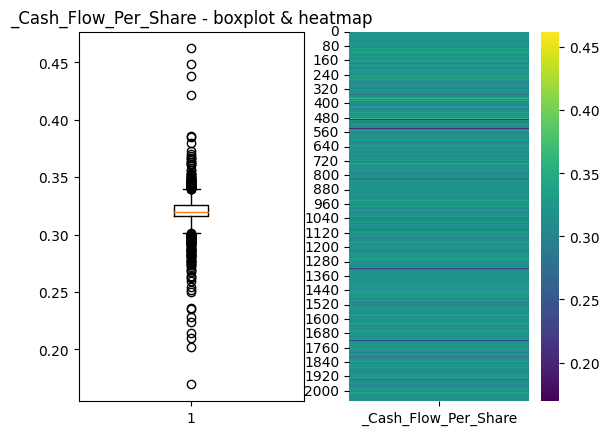

<Figure size 400x300 with 0 Axes>

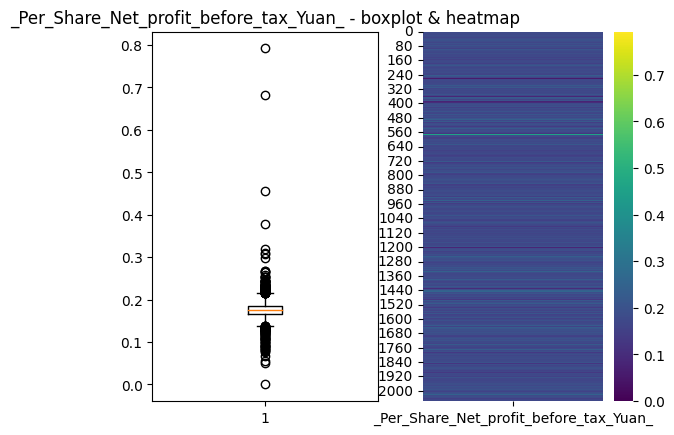

<Figure size 400x300 with 0 Axes>

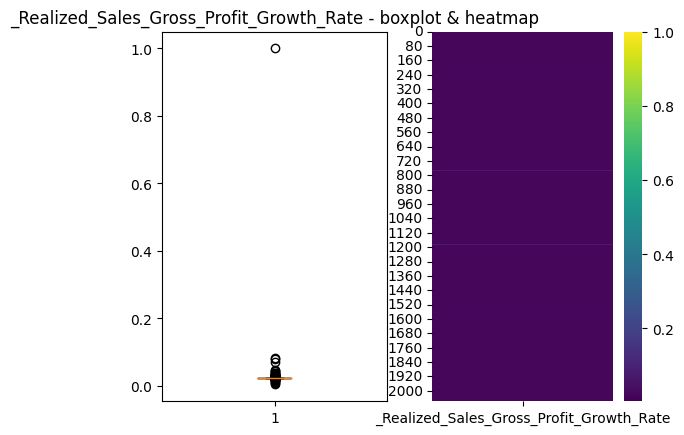

<Figure size 400x300 with 0 Axes>

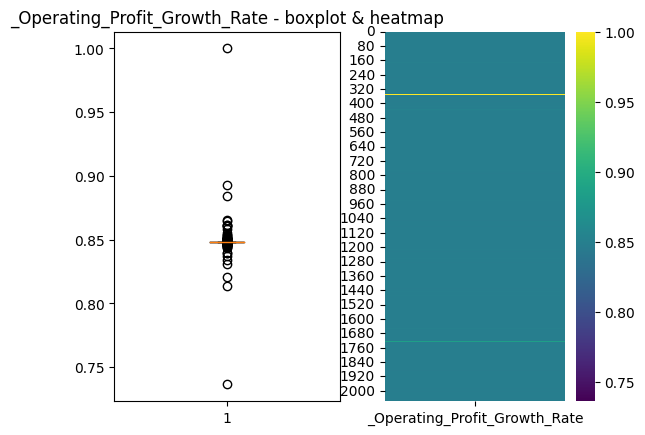

<Figure size 400x300 with 0 Axes>

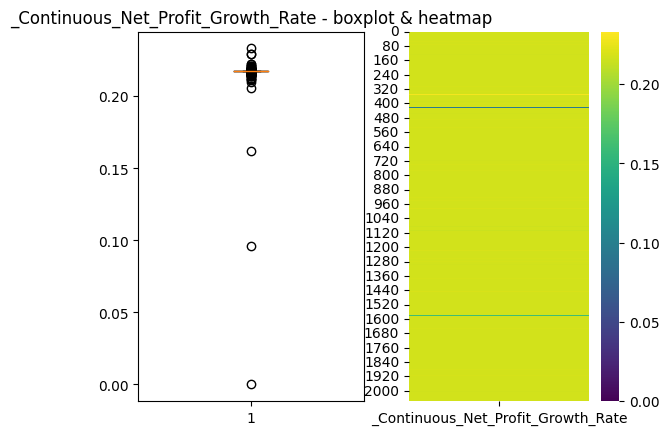

<Figure size 400x300 with 0 Axes>

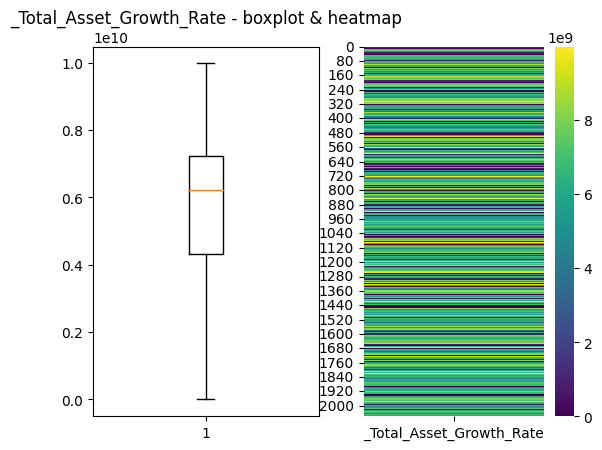

<Figure size 400x300 with 0 Axes>

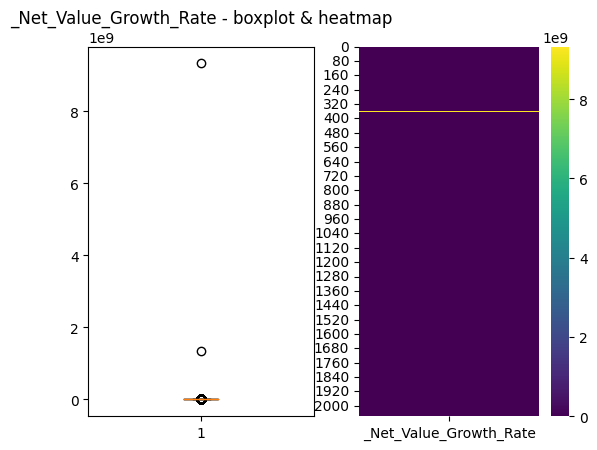

<Figure size 400x300 with 0 Axes>

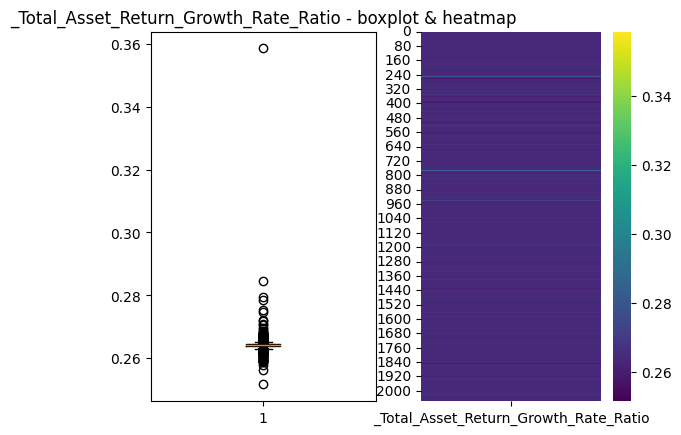

<Figure size 400x300 with 0 Axes>

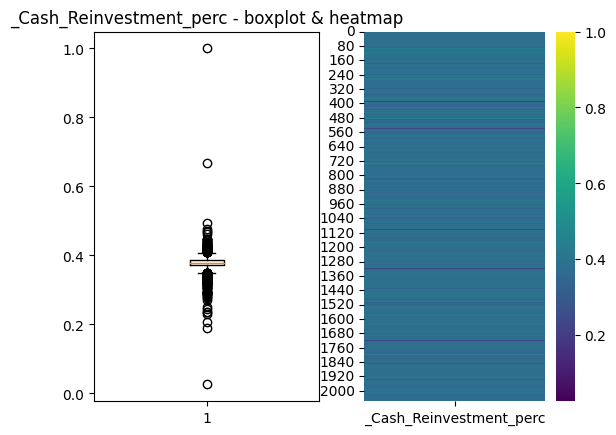

<Figure size 400x300 with 0 Axes>

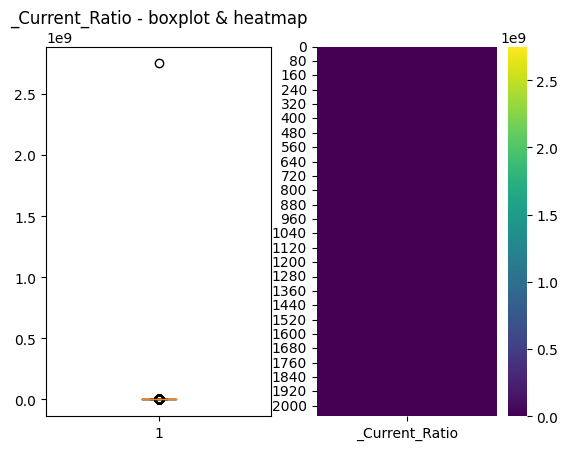

<Figure size 400x300 with 0 Axes>

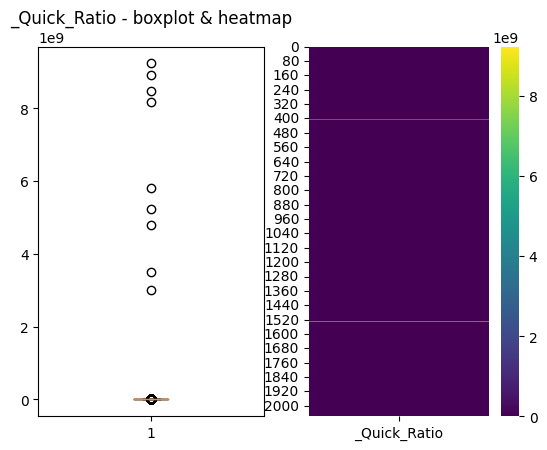

<Figure size 400x300 with 0 Axes>

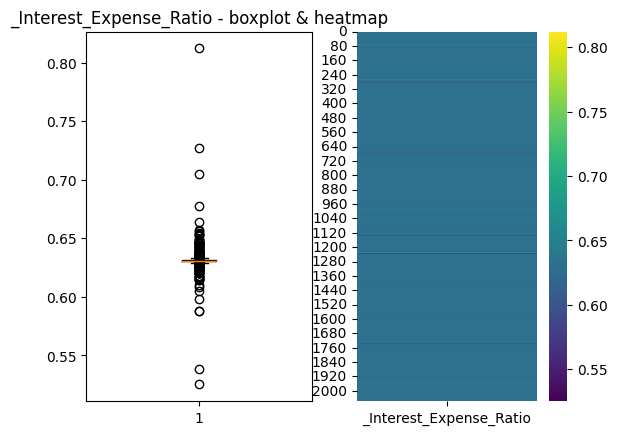

<Figure size 400x300 with 0 Axes>

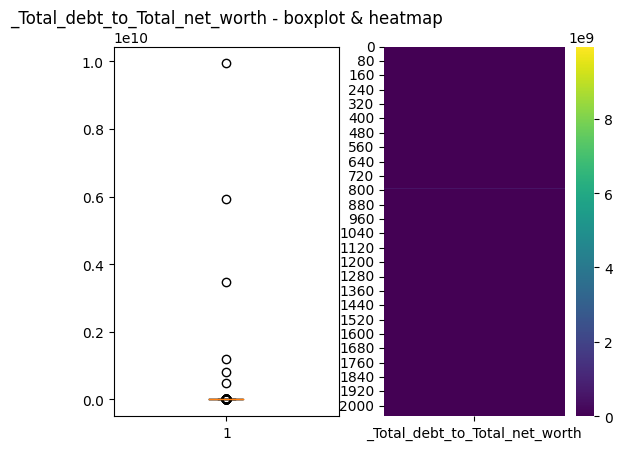

<Figure size 400x300 with 0 Axes>

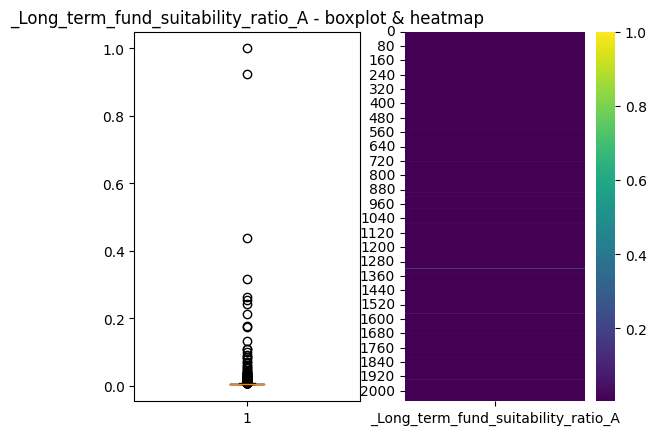

<Figure size 400x300 with 0 Axes>

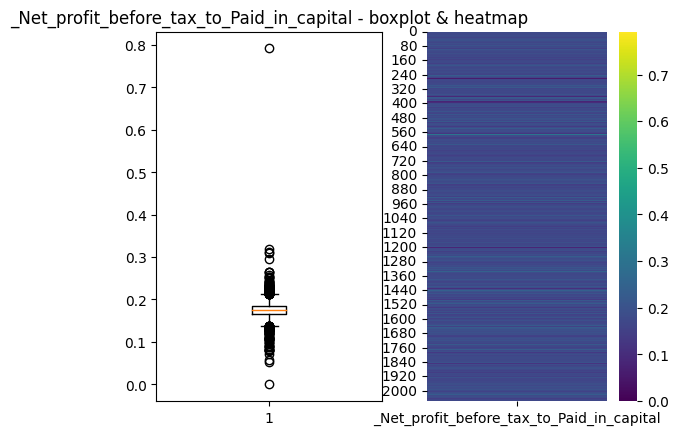

<Figure size 400x300 with 0 Axes>

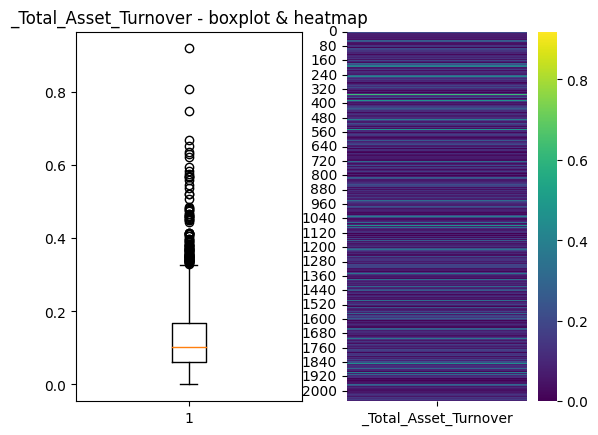

<Figure size 400x300 with 0 Axes>

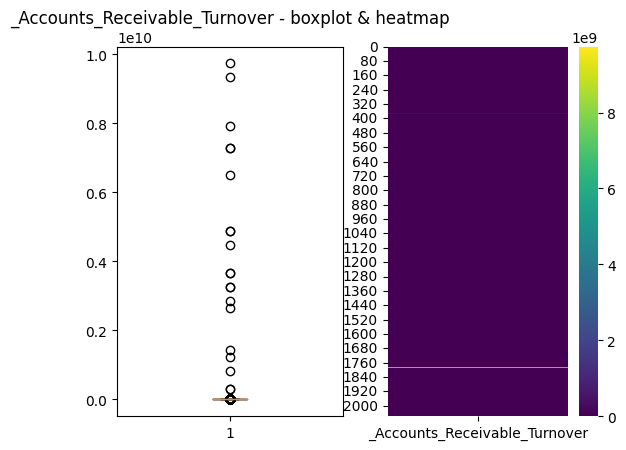

<Figure size 400x300 with 0 Axes>

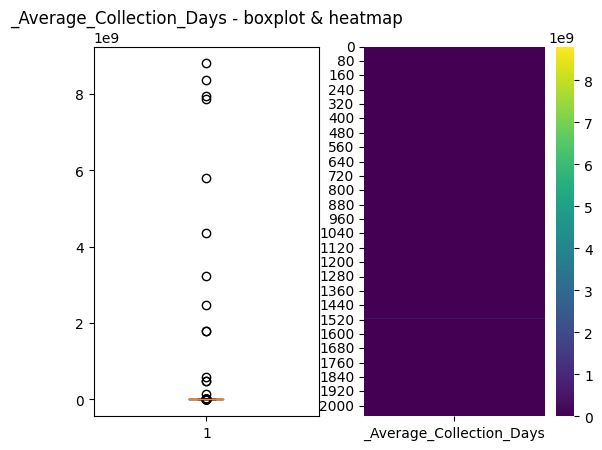

<Figure size 400x300 with 0 Axes>

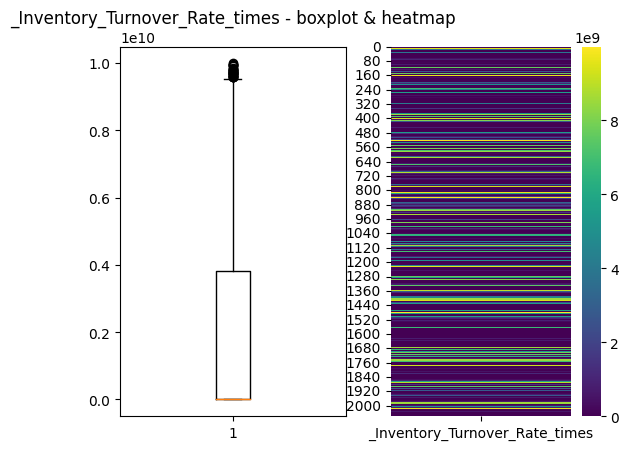

<Figure size 400x300 with 0 Axes>

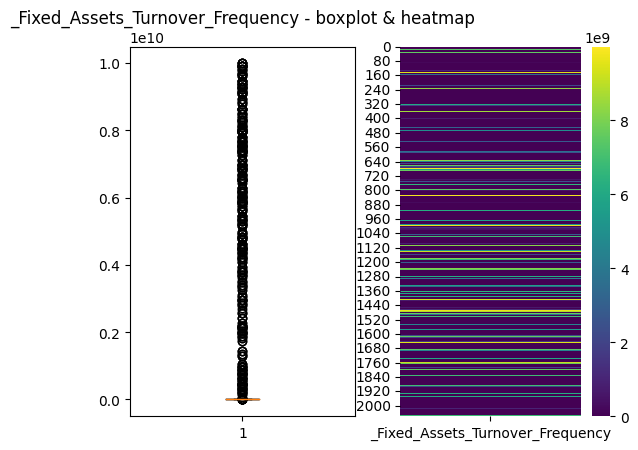

<Figure size 400x300 with 0 Axes>

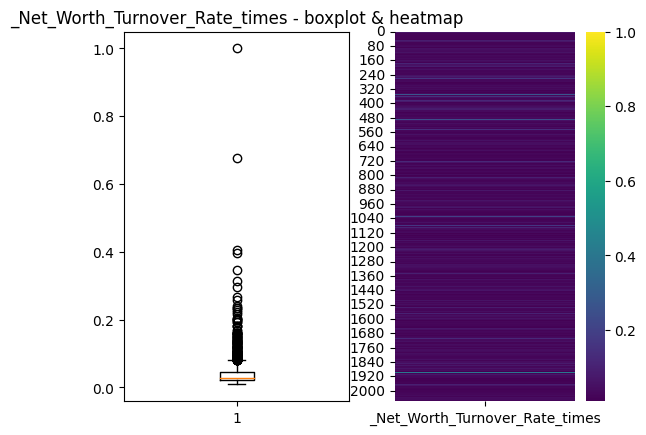

<Figure size 400x300 with 0 Axes>

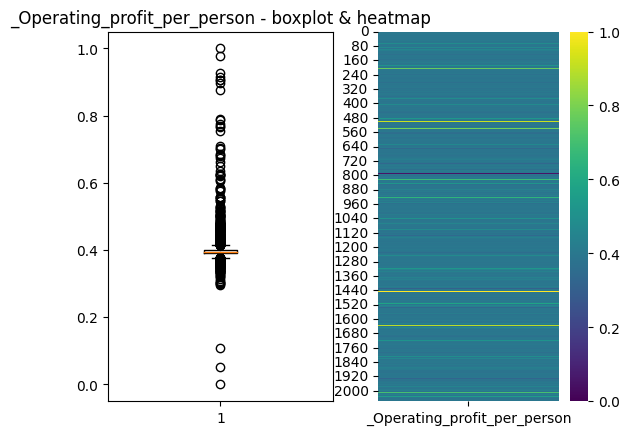

<Figure size 400x300 with 0 Axes>

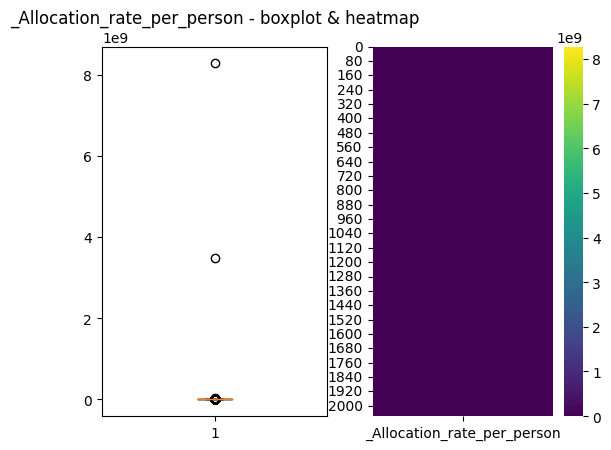

<Figure size 400x300 with 0 Axes>

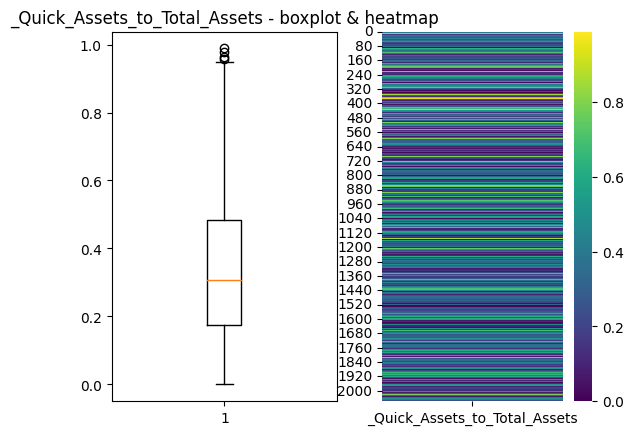

<Figure size 400x300 with 0 Axes>

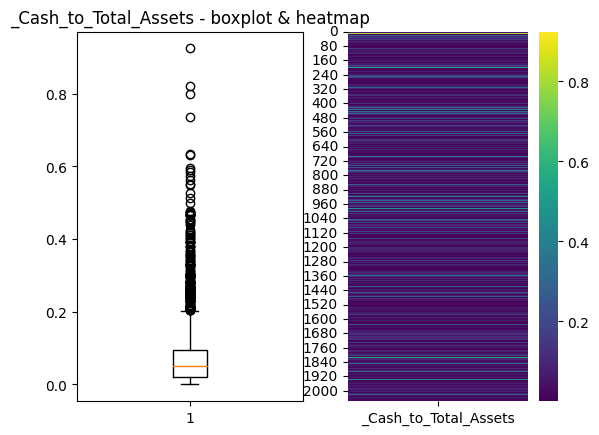

<Figure size 400x300 with 0 Axes>

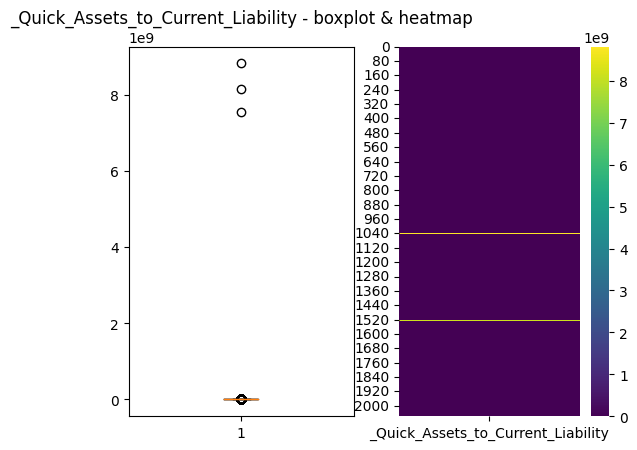

<Figure size 400x300 with 0 Axes>

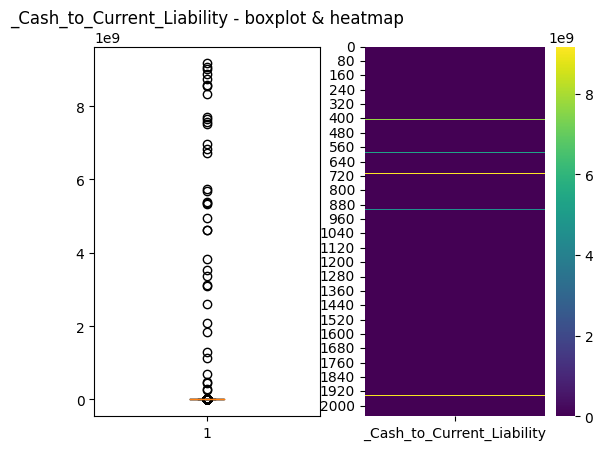

<Figure size 400x300 with 0 Axes>

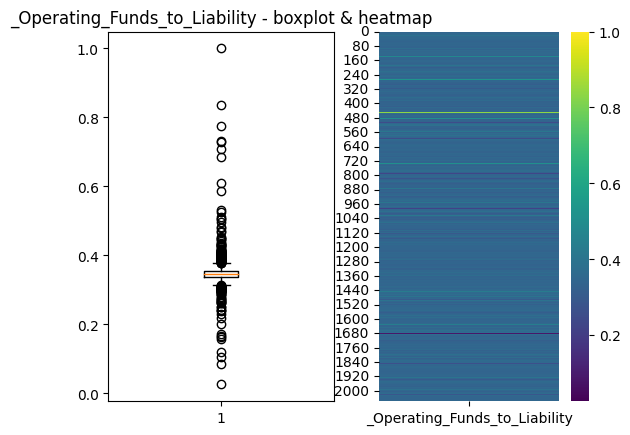

<Figure size 400x300 with 0 Axes>

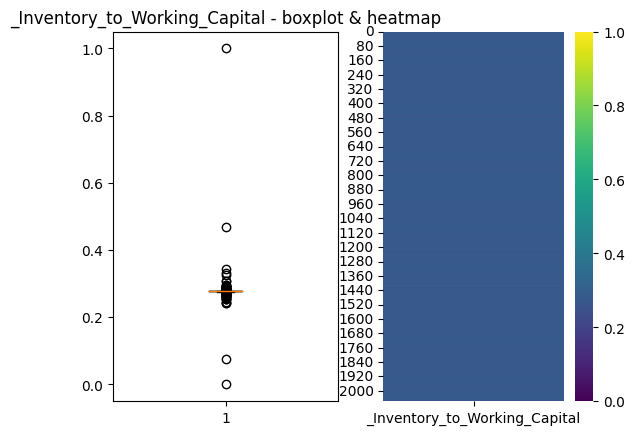

<Figure size 400x300 with 0 Axes>

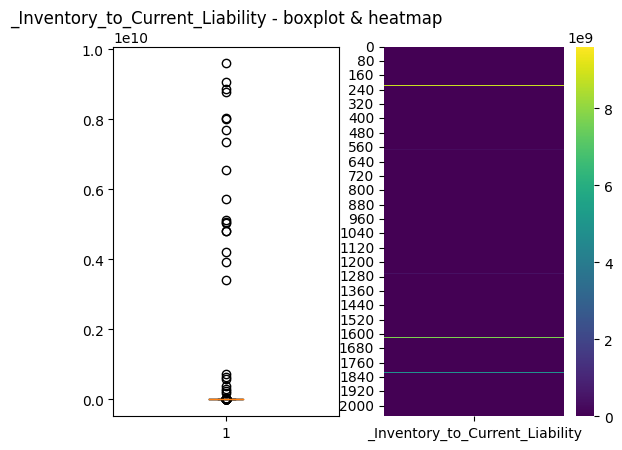

<Figure size 400x300 with 0 Axes>

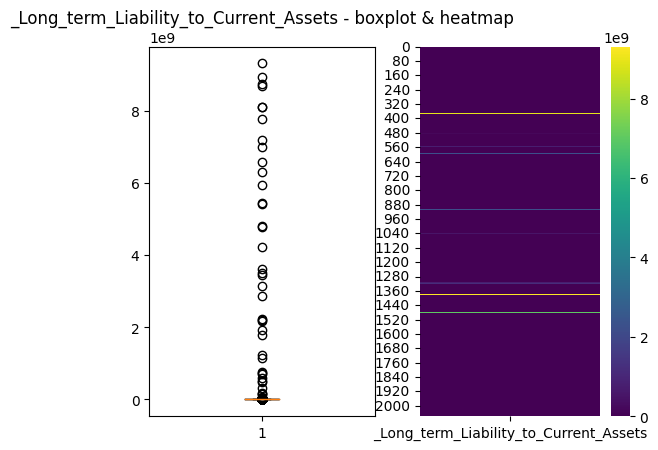

<Figure size 400x300 with 0 Axes>

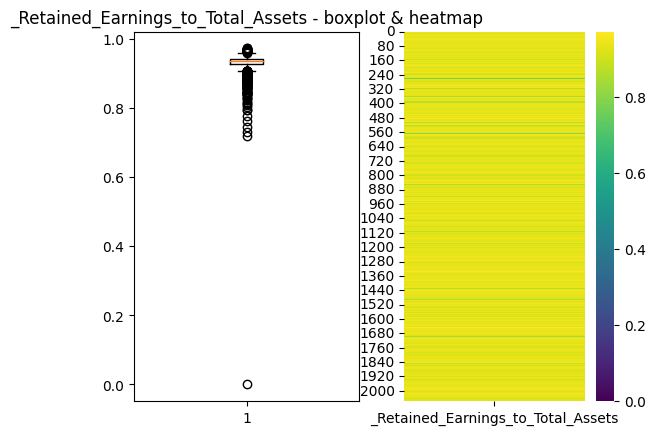

<Figure size 400x300 with 0 Axes>

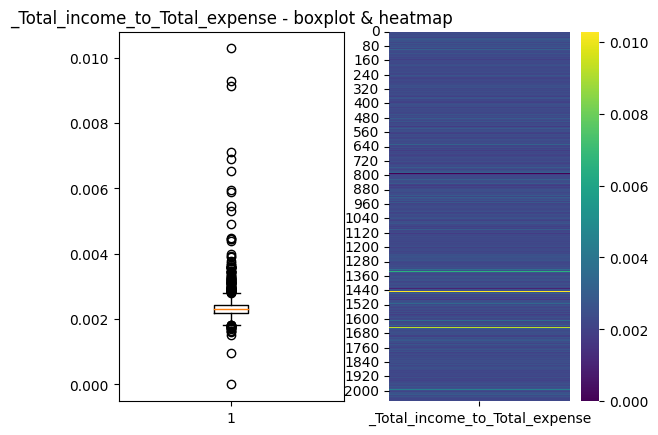

<Figure size 400x300 with 0 Axes>

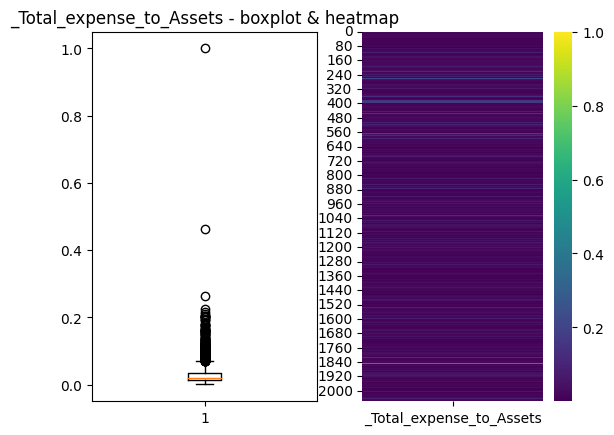

<Figure size 400x300 with 0 Axes>

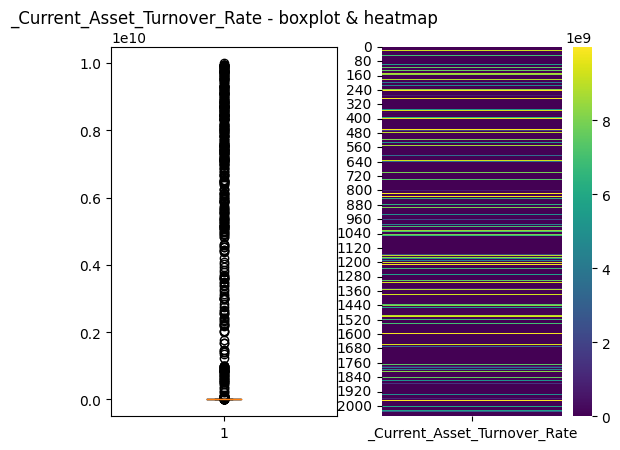

<Figure size 400x300 with 0 Axes>

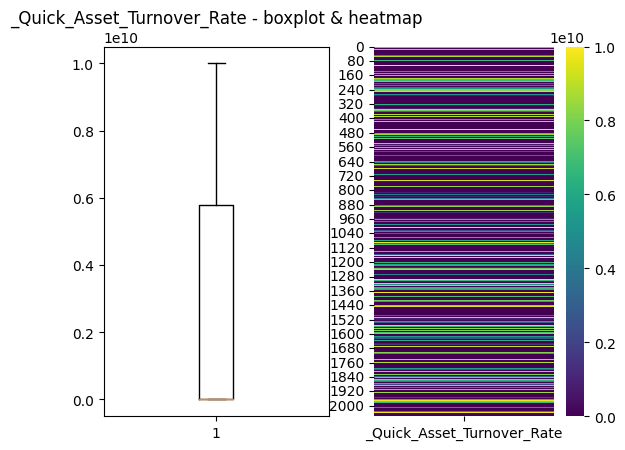

<Figure size 400x300 with 0 Axes>

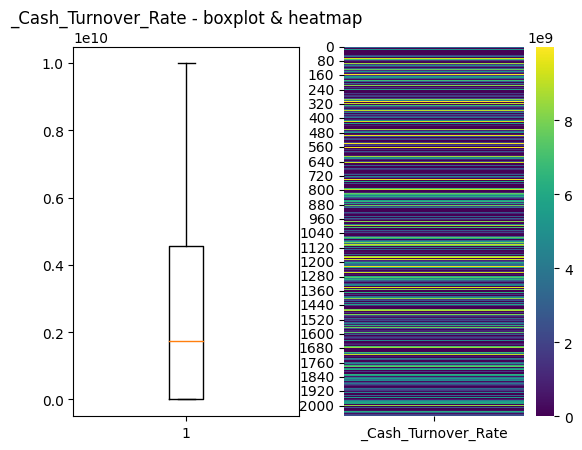

<Figure size 400x300 with 0 Axes>

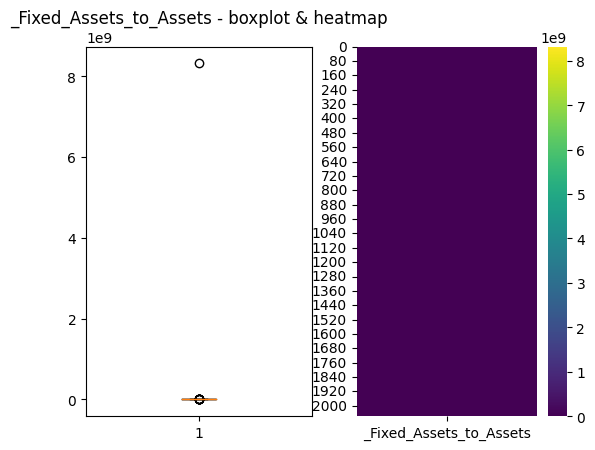

<Figure size 400x300 with 0 Axes>

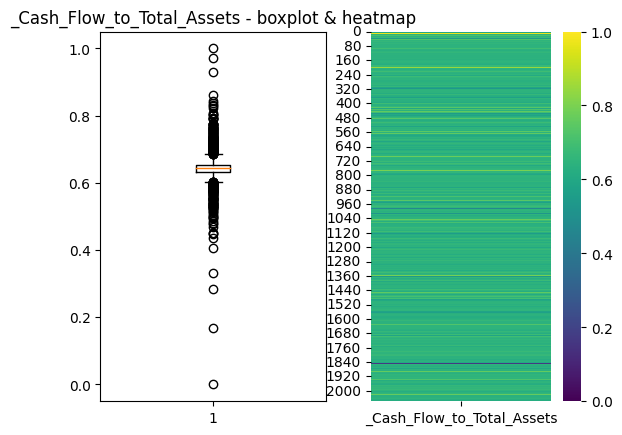

<Figure size 400x300 with 0 Axes>

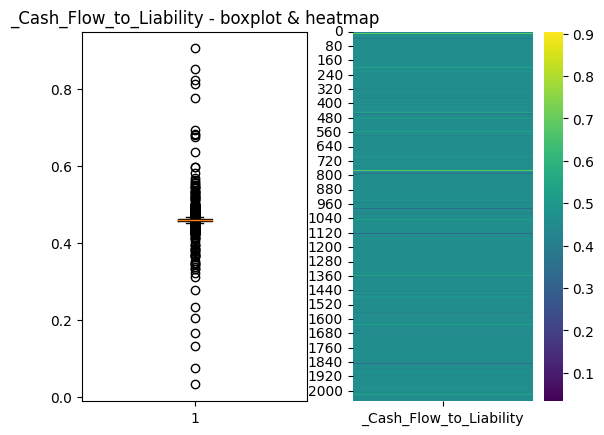

<Figure size 400x300 with 0 Axes>

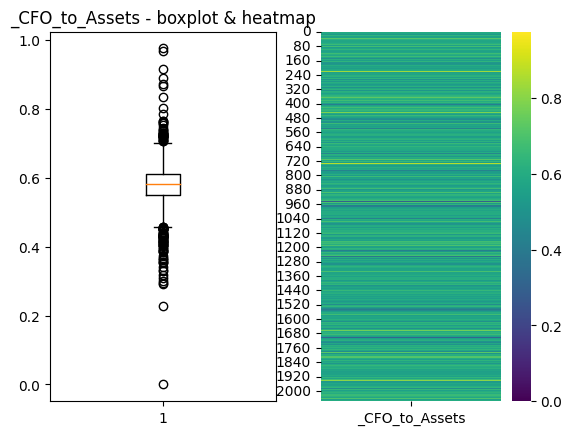

<Figure size 400x300 with 0 Axes>

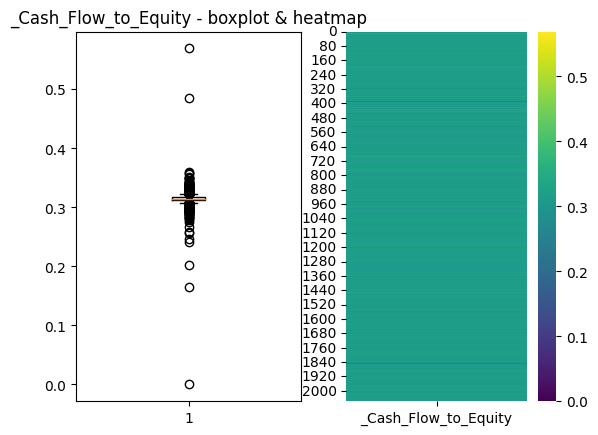

<Figure size 400x300 with 0 Axes>

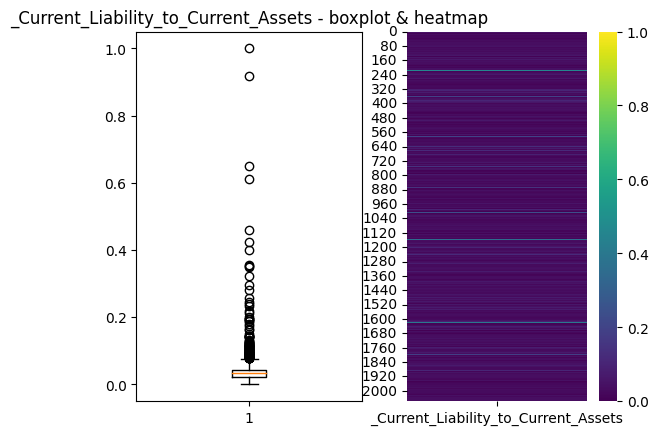

<Figure size 400x300 with 0 Axes>

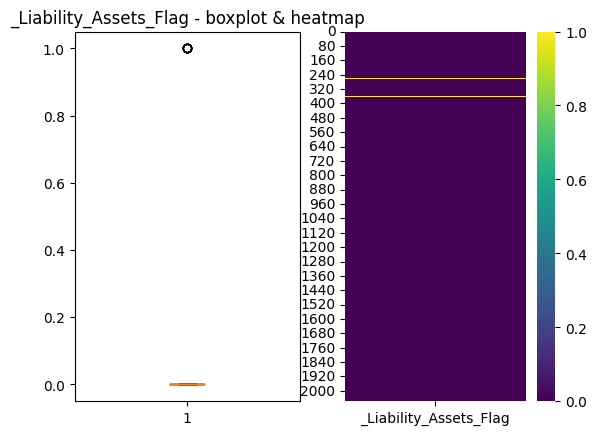

<Figure size 400x300 with 0 Axes>

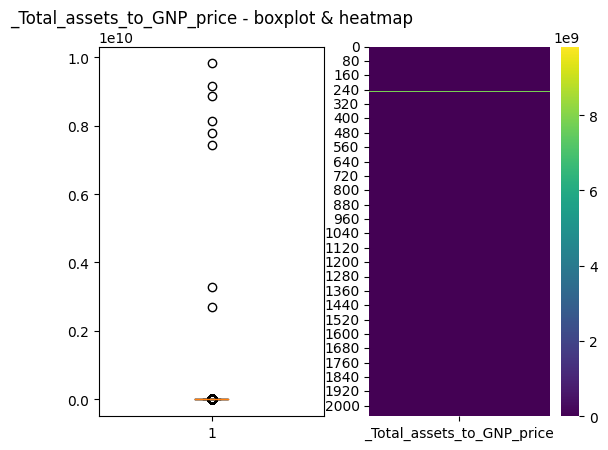

<Figure size 400x300 with 0 Axes>

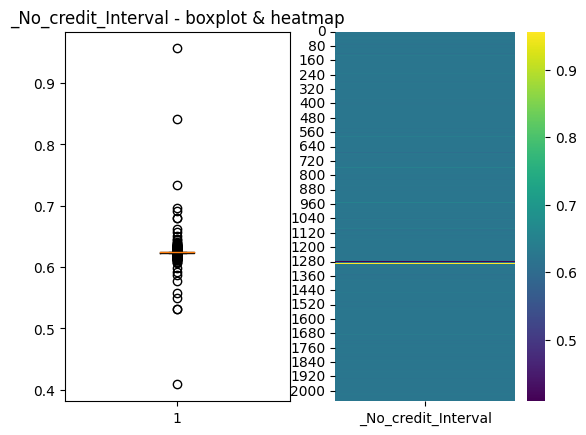

<Figure size 400x300 with 0 Axes>

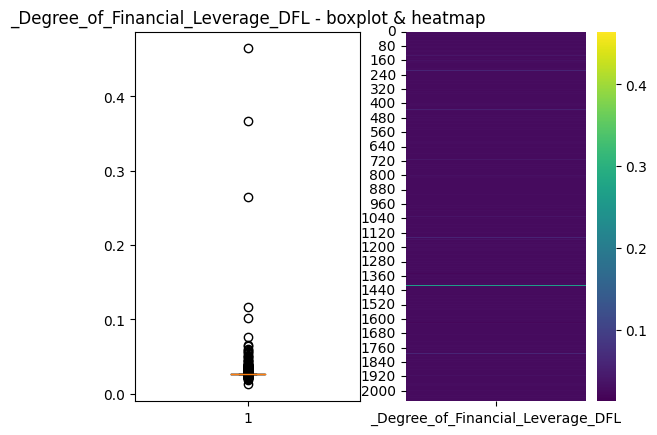

<Figure size 400x300 with 0 Axes>

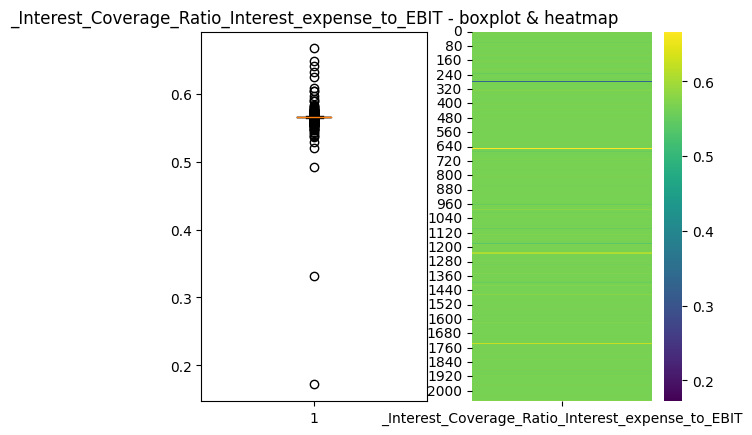

<Figure size 400x300 with 0 Axes>

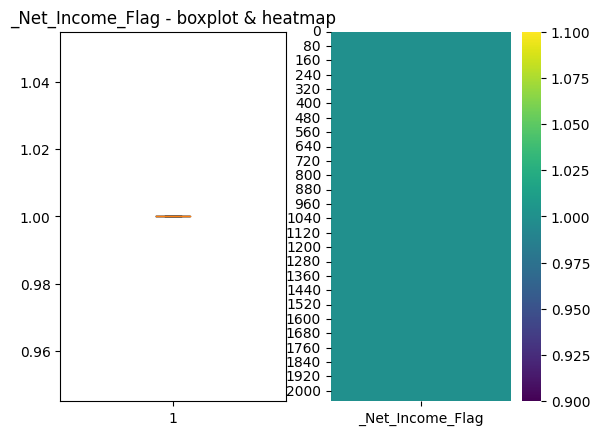

<Figure size 400x300 with 0 Axes>

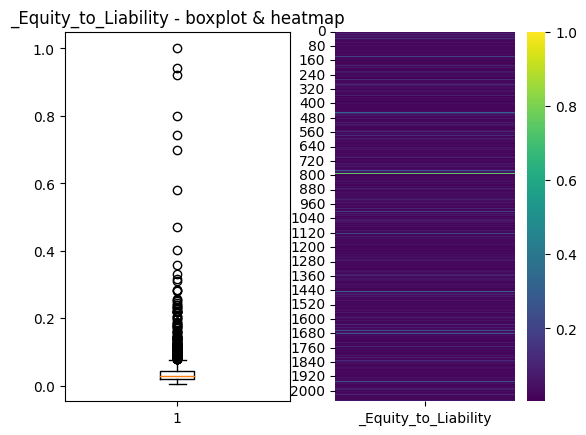

<Figure size 400x300 with 0 Axes>

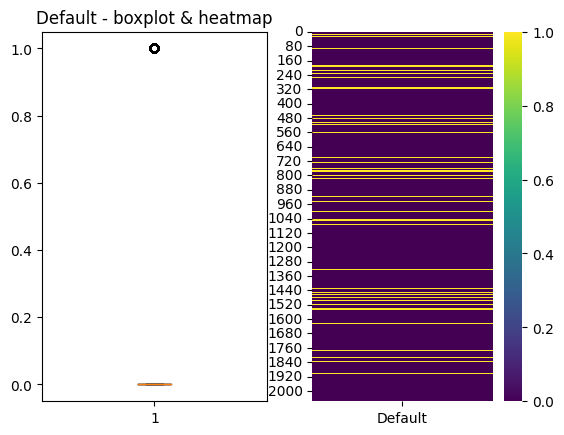

<Figure size 400x300 with 0 Axes>

In [ ]:
##
## now lets call the function to create boxplots


for columns in comp2.columns:
    to_create_boxplot(comp2[columns], columns)




In [ ]:
##
## lets see how many values outliers for each column.

def to_count_outliers(columns, names):
    q1 = np.percentile(columns, 25)
    q3 = np.percentile(columns, 75)
    iqr = q3 - q1
    lower_whisker = q1 - (1.5 * iqr)
    upper_whisker = q3 + (1.5 * iqr)
    outliers = columns[(columns < lower_whisker) | (columns > upper_whisker)]
    print(f"{names} --> {len(outliers)}")


In [ ]:
##
## lets run the function and see

for columns in comp2.columns:
    to_count_outliers(comp2[columns], columns)


## we have features that have 15% or more outliers out of the total volumne, treating them would induce a lot of synthetic data.
## we have to decide whether to keep them or not

## i am going to keep the outliers as they are, because tampering with them might lead to the introduction of bias.
## lets first asses the performance of the models down the line and then come back to outlier treatment again.

_Operating_Expense_Rate --> 0
_Research_and_development_expense_rate --> 264
_Cash_flow_rate --> 206
_Interest_bearing_debt_interest_rate --> 94
_Tax_rate_A --> 42
_Cash_Flow_Per_Share --> 191
_Per_Share_Net_profit_before_tax_Yuan_ --> 186
_Realized_Sales_Gross_Profit_Growth_Rate --> 283
_Operating_Profit_Growth_Rate --> 317
_Continuous_Net_Profit_Growth_Rate --> 340
_Total_Asset_Growth_Rate --> 0
_Net_Value_Growth_Rate --> 304
_Total_Asset_Return_Growth_Rate_Ratio --> 226
_Cash_Reinvestment_perc --> 220
_Current_Ratio --> 193
_Quick_Ratio --> 190
_Interest_Expense_Ratio --> 328
_Total_debt_to_Total_net_worth --> 105
_Long_term_fund_suitability_ratio_A --> 234
_Net_profit_before_tax_to_Paid_in_capital --> 173
_Total_Asset_Turnover --> 101
_Accounts_Receivable_Turnover --> 281
_Average_Collection_Days --> 77
_Inventory_Turnover_Rate_times --> 29
_Fixed_Assets_Turnover_Frequency --> 501
_Net_Worth_Turnover_Rate_times --> 165
_Operating_profit_per_person --> 357
_Allocation_rate_per_perso

## lets do some EDA

In [ ]:
##
## lets see if there are multiple instances of the same company code

comp1['Co_Code'].duplicated().sum()

## even though we have removed them it is better we just do a check

0

In [ ]:
##
## lets do the same for company name

comp1['Co_Name'].duplicated().sum()

## we are in the safe zone.
## this means we dont have to worry about grouping the data

0

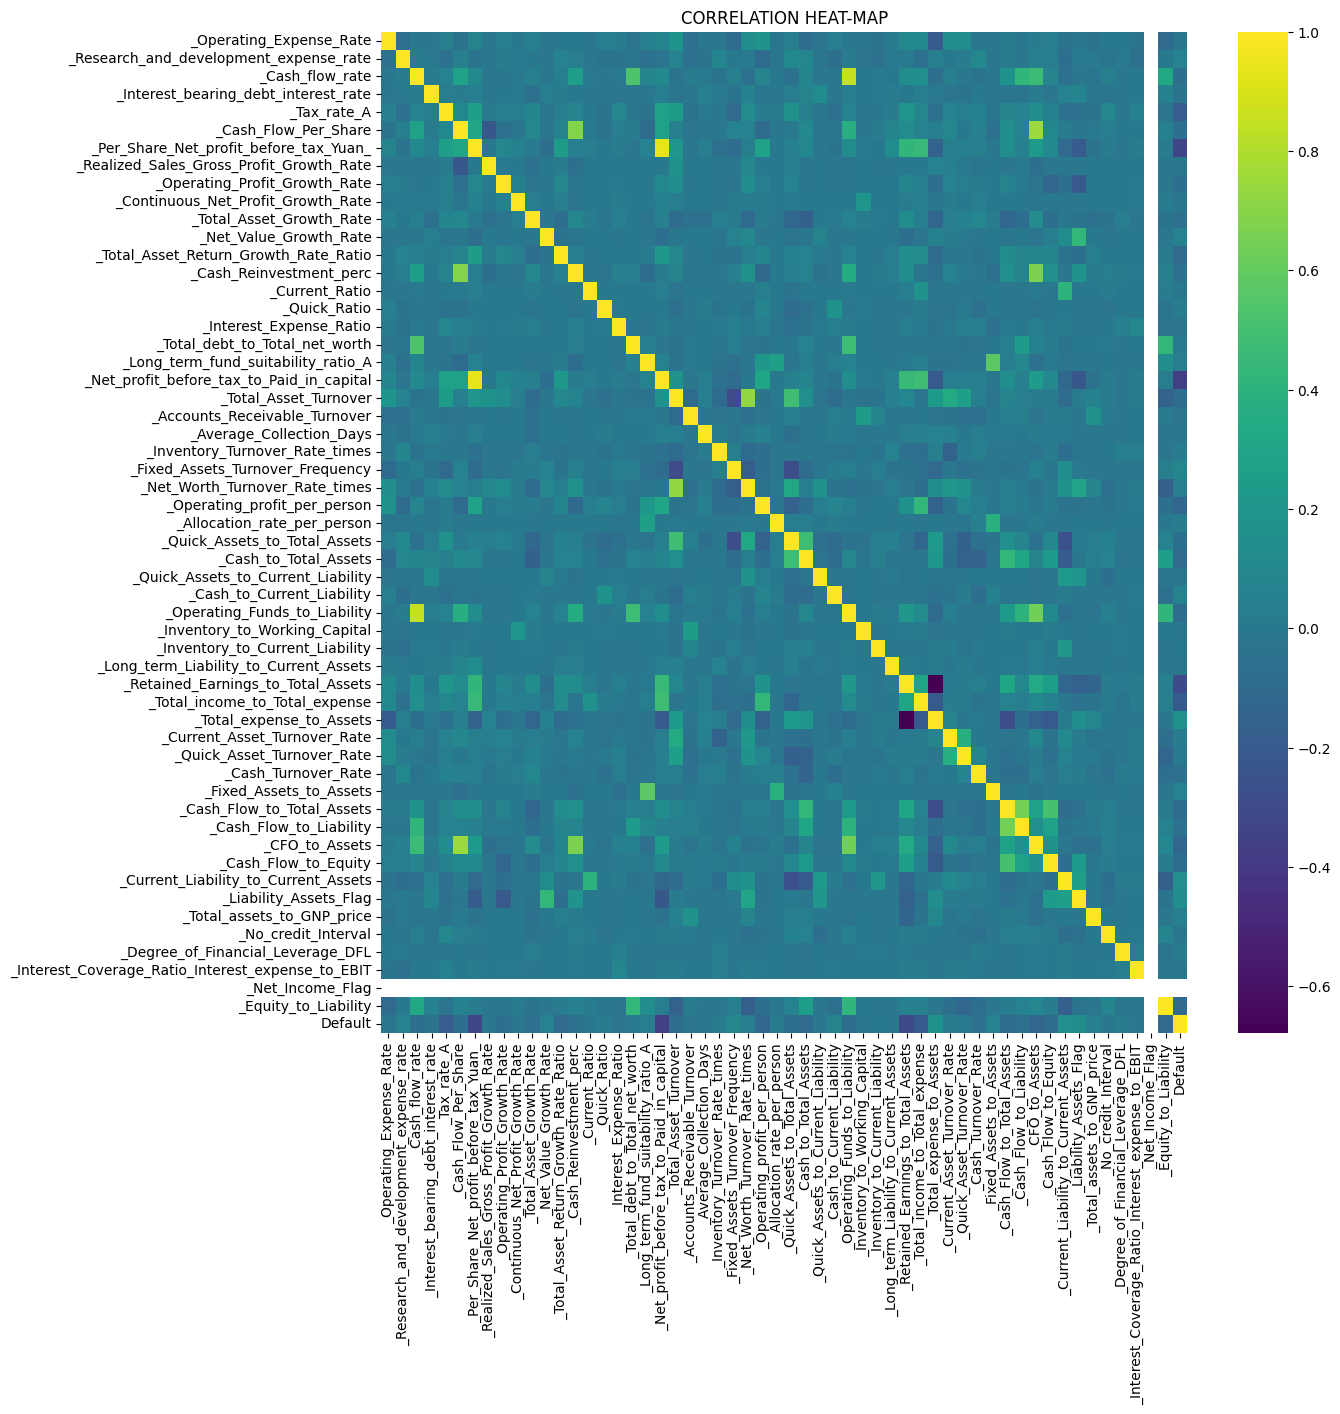

In [ ]:
##
## we will start with a heatmap

plt.figure(figsize = (13, 13))
sns.heatmap(comp2.corr(), cmap = 'viridis')
plt.title('CORRELATION HEAT-MAP')
plt.show()


## we have like four highly correlated features other than the diagonal, they are given below, we can remove one from each pair
## _Per_Share_Net_profit_before_tax_Yuan_ --> _Net_profit_before_tax_to_Paid_in_capital
## _Cash_flow_rate --> _Operating_Funds_to_Liability
## removing the ones that have higher outliers.

## _Total_expense_to_Assets --> _Retained_Earnings_to_Total_Assets
## the above seems to be the only pair that is negatively correlated, we can remove one of those variables.


## See _Net_Income_Flag has no variance, hence removing this feature too.

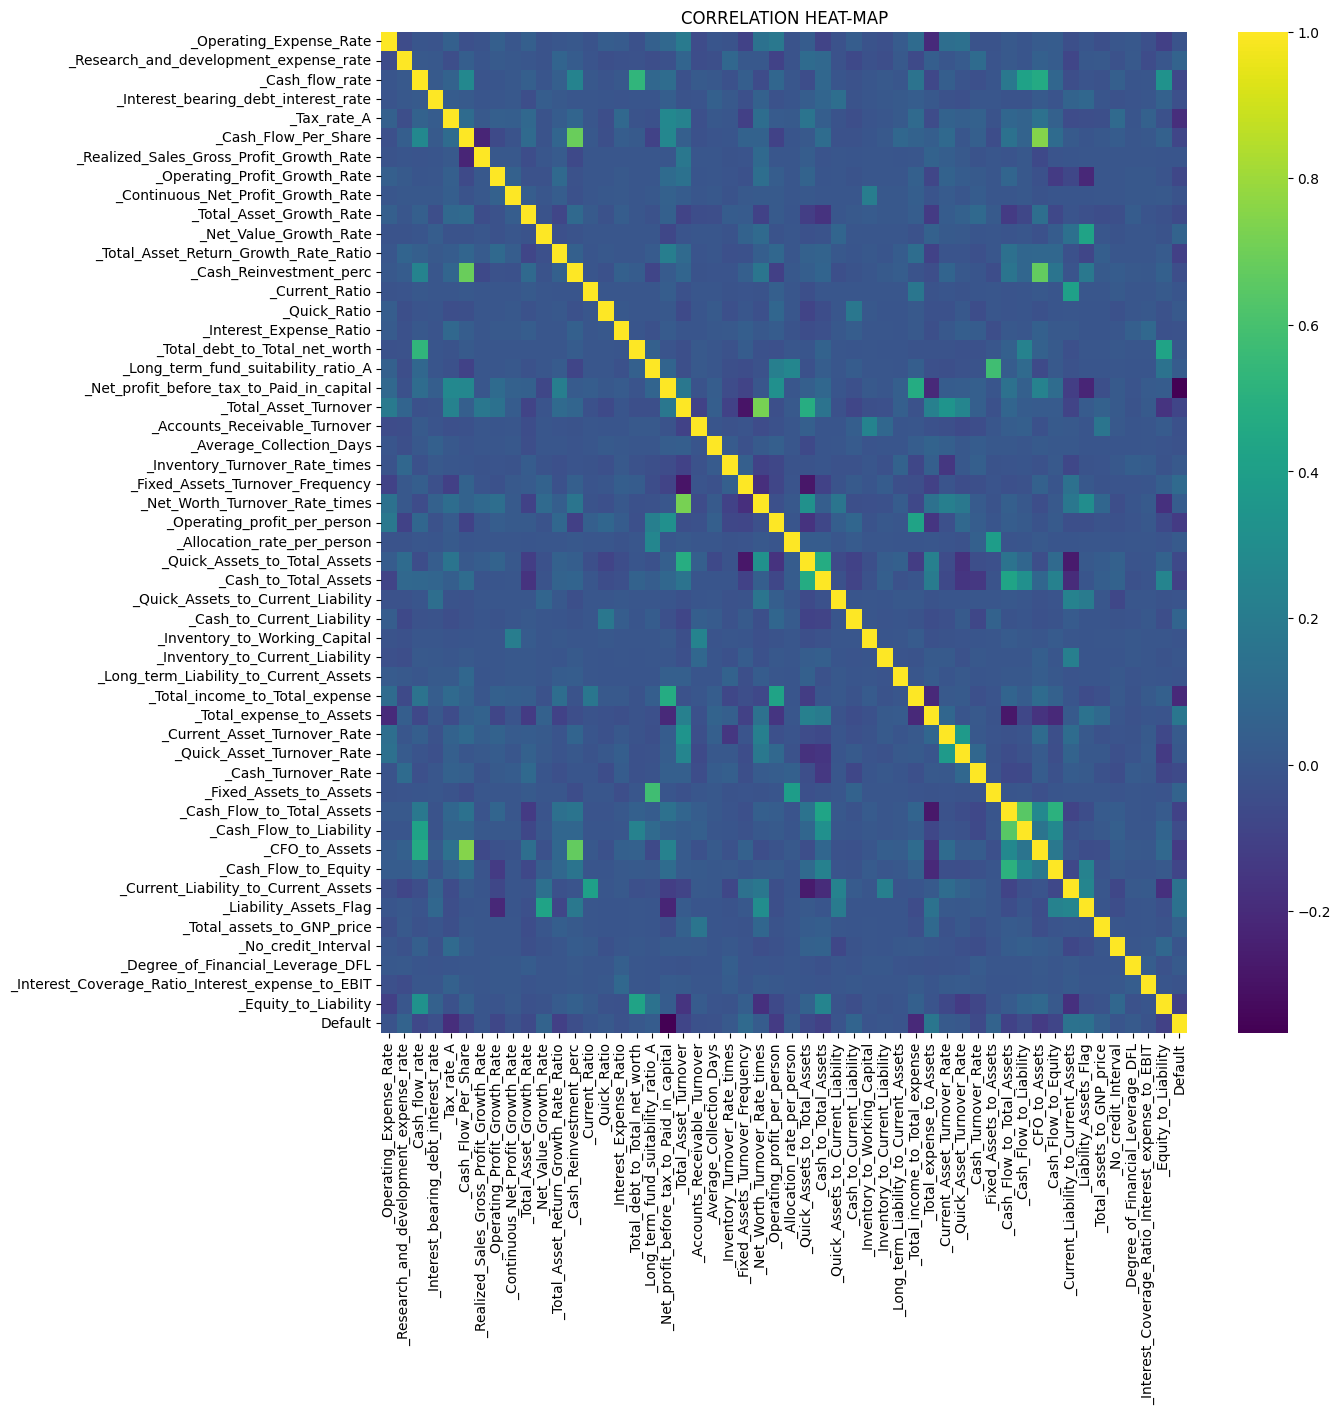

In [ ]:
##
## lets remove the features that we have decided

comp2.drop(['_Per_Share_Net_profit_before_tax_Yuan_', '_Operating_Funds_to_Liability',
            '_Retained_Earnings_to_Total_Assets', '_Net_Income_Flag'], axis = 1, inplace = True)


## again the heatmap
plt.figure(figsize = (13, 13))
sns.heatmap(comp2.corr(), cmap = 'viridis')
plt.title('CORRELATION HEAT-MAP')
plt.show()



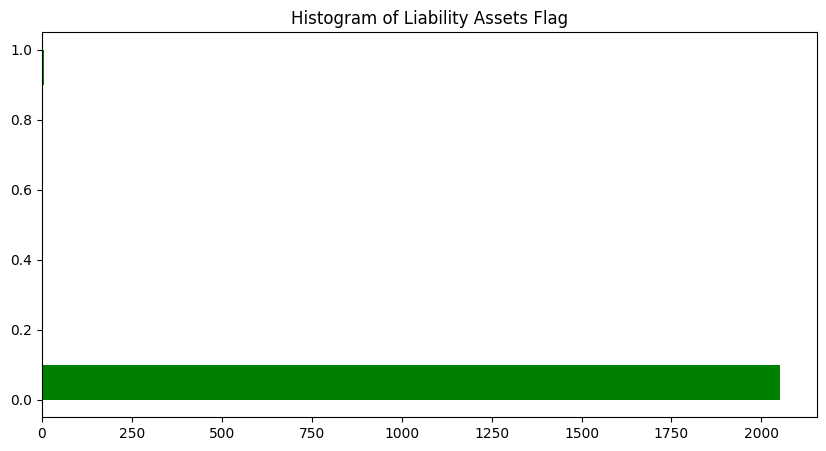

In [ ]:
##
## plot of _Liability_Assets_Flag


plt.figure(figsize = (10, 5))
plt.hist(data = comp2, x = "_Liability_Assets_Flag", color = 'g', orientation = 'horizontal')
plt.title('Histogram of Liability Assets Flag')
plt.show()


In [ ]:
##
##

comp2['_Liability_Assets_Flag'].head()

0    0
1    0
2    0
3    0
4    0
Name: _Liability_Assets_Flag, dtype: int64

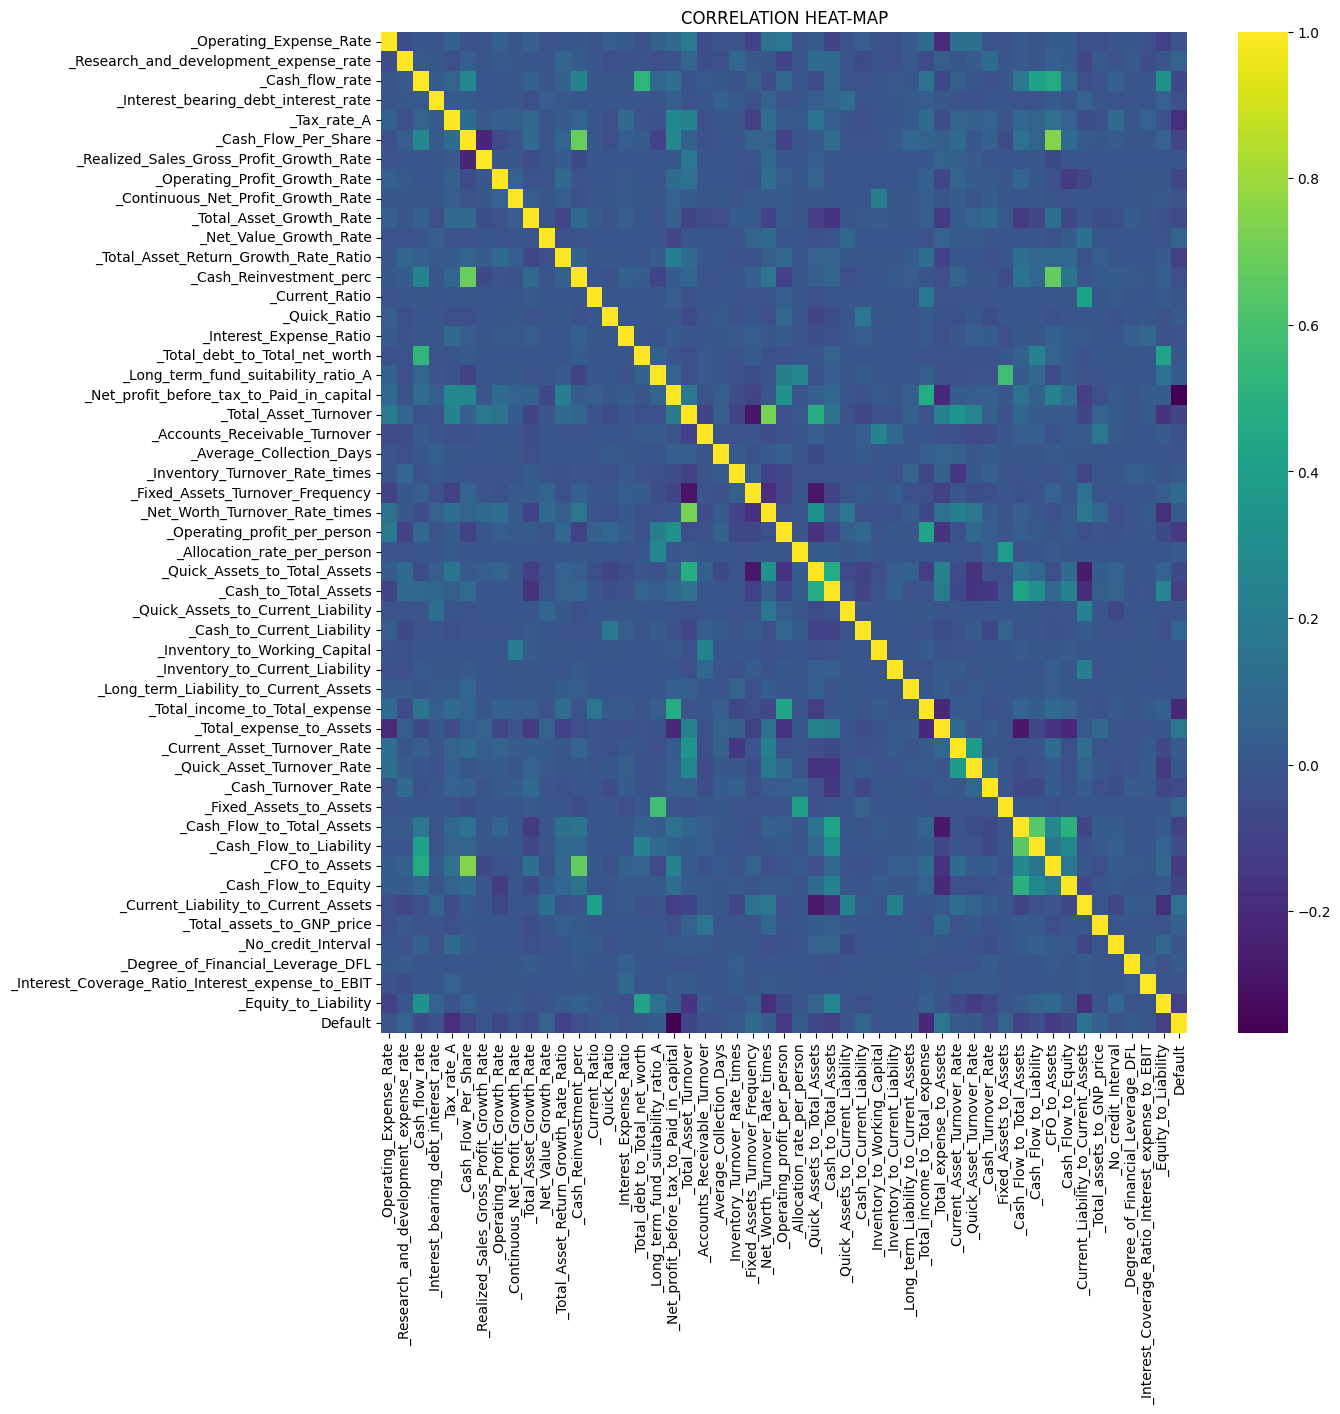

In [ ]:
##
## removing _Liability_Assets_Flag as it is all zeroes except for a few instances

comp2.drop(['_Liability_Assets_Flag'], axis = 1, inplace = True)


## again the heatmap
plt.figure(figsize = (13, 13))
sns.heatmap(comp2.corr(), cmap = 'viridis')
plt.title('CORRELATION HEAT-MAP')
plt.show()


## as we remove rows the heatmap is calibrating the color, that is slightly throwing me off.


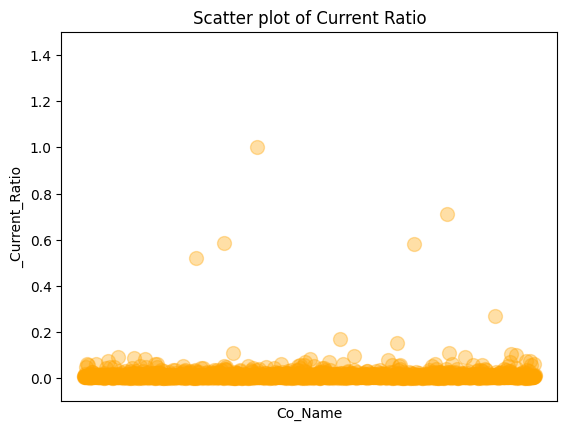

In [ ]:
##
## Current Ratio

comp1.plot.scatter(x='Co_Name', y='_Current_Ratio', s=100, color = 'orange', alpha = 0.35)
plt.title('Scatter plot of Current Ratio')
plt.xticks([])
plt.ylim(-0.10, 1.50)
plt.show()


## yikes
## A current ratio greater than 1 indicates that the company has more assets than liabilities *_*
## suggesting good stability, a ratio less than 1 may indicate liquidity problems
## most of our data is under 0.20


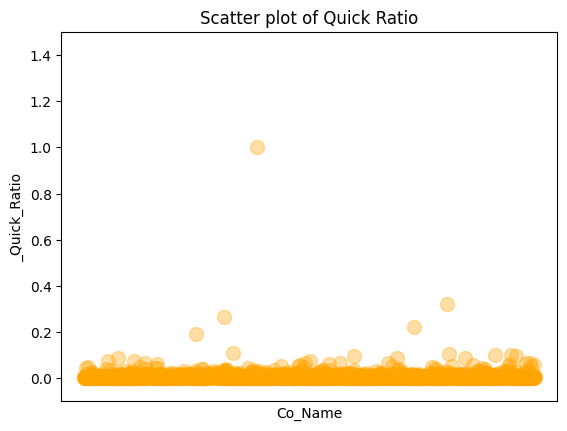

In [ ]:
##
## now lets try quick ratio


comp1.plot.scatter(x='Co_Name', y='_Quick_Ratio', s=100, color = 'orange', alpha = 0.35)
plt.title('Scatter plot of Quick Ratio')
plt.xticks([])
plt.ylim(-0.10, 1.50)
plt.show()

## similar as current ratio


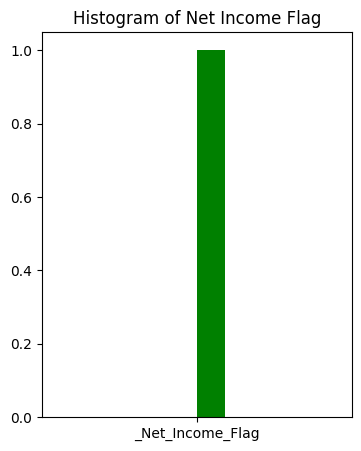

In [ ]:
##
## net income flag


plt.figure(figsize = (4, 5))
plt.hist(data = comp2, x = "_Net_Income_Flag", color = 'g')
plt.title('Histogram of Net Income Flag')
plt.show()


In [ ]:
##
## from the statsmodel logistic regression summary report, by using the p-value *_*
## we were able to find the significant variables. From this we will see how they fare up.


selected_column_indices = [1, 16, 34, 38, 40, 41, 49]
comp2_reduced = comp2.iloc[:, selected_column_indices]

comp2_reduced.head()

_Research_and_development_expense_rate  _Total_debt_to_Total_net_worth  \
0                            0.000000e+00                        0.026006   
1                            4.230000e+09                        0.006812   
2                            8.150000e+08                        0.004105   
3                            0.000000e+00                        0.007846   
4                            0.000000e+00                        0.013671   

   _Total_income_to_Total_expense  _Cash_Turnover_Rate  \
0                        0.002687         5.470000e+09   
1                        0.002044         8.820000e+08   
2                        0.002324         6.790000e+08   
3                        0.002334         6.020000e+09   
4                        0.002310         5.670000e+09   

   _Cash_Flow_to_Total_Assets  _Cash_Flow_to_Liability  _Equity_to_Liability  
0                    0.632666                 0.458073              0.015338  
1                    0.642967                 0.459282              0.029445  
2                    0.644486                 0.459700              0.041718  
3                    0.656832                 0.461860              0.026956  
4                    0.656549                 0.461238              0.019900

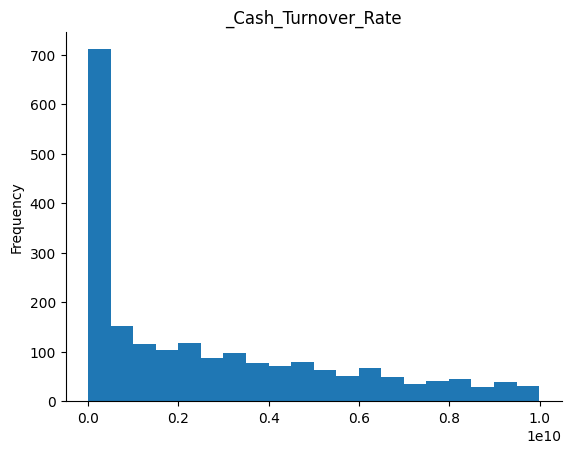

In [ ]:
##
##

comp2_reduced['_Cash_Turnover_Rate'].plot(kind='hist', bins=20, title='_Cash_Turnover_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

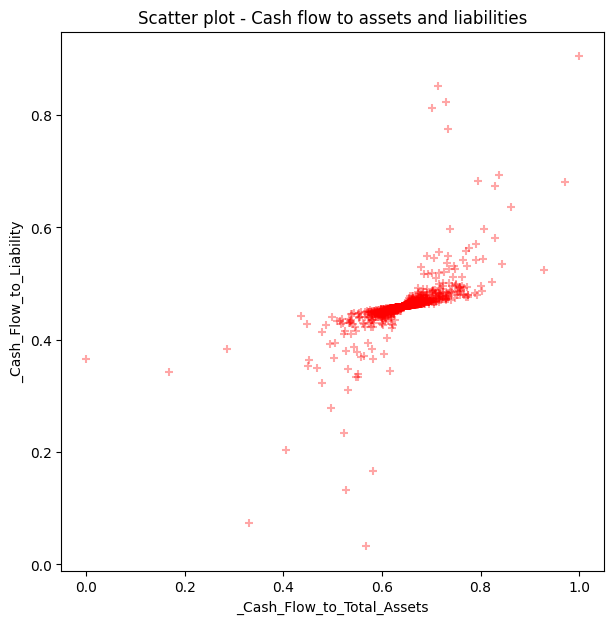

In [ ]:
##
## lets plot _Cash_Flow_to_Total_Assets against	_Cash_Flow_to_Liability


plt.figure(figsize = (7, 7))
plt.scatter(data = comp2_reduced, x = '_Cash_Flow_to_Total_Assets',
            y = '_Cash_Flow_to_Liability', alpha = 0.35, marker = '+', color = 'r')
plt.xlabel('_Cash_Flow_to_Total_Assets')
plt.ylabel('_Cash_Flow_to_Liability')
plt.title('Scatter plot - Cash flow to assets and liabilities')
plt.show()

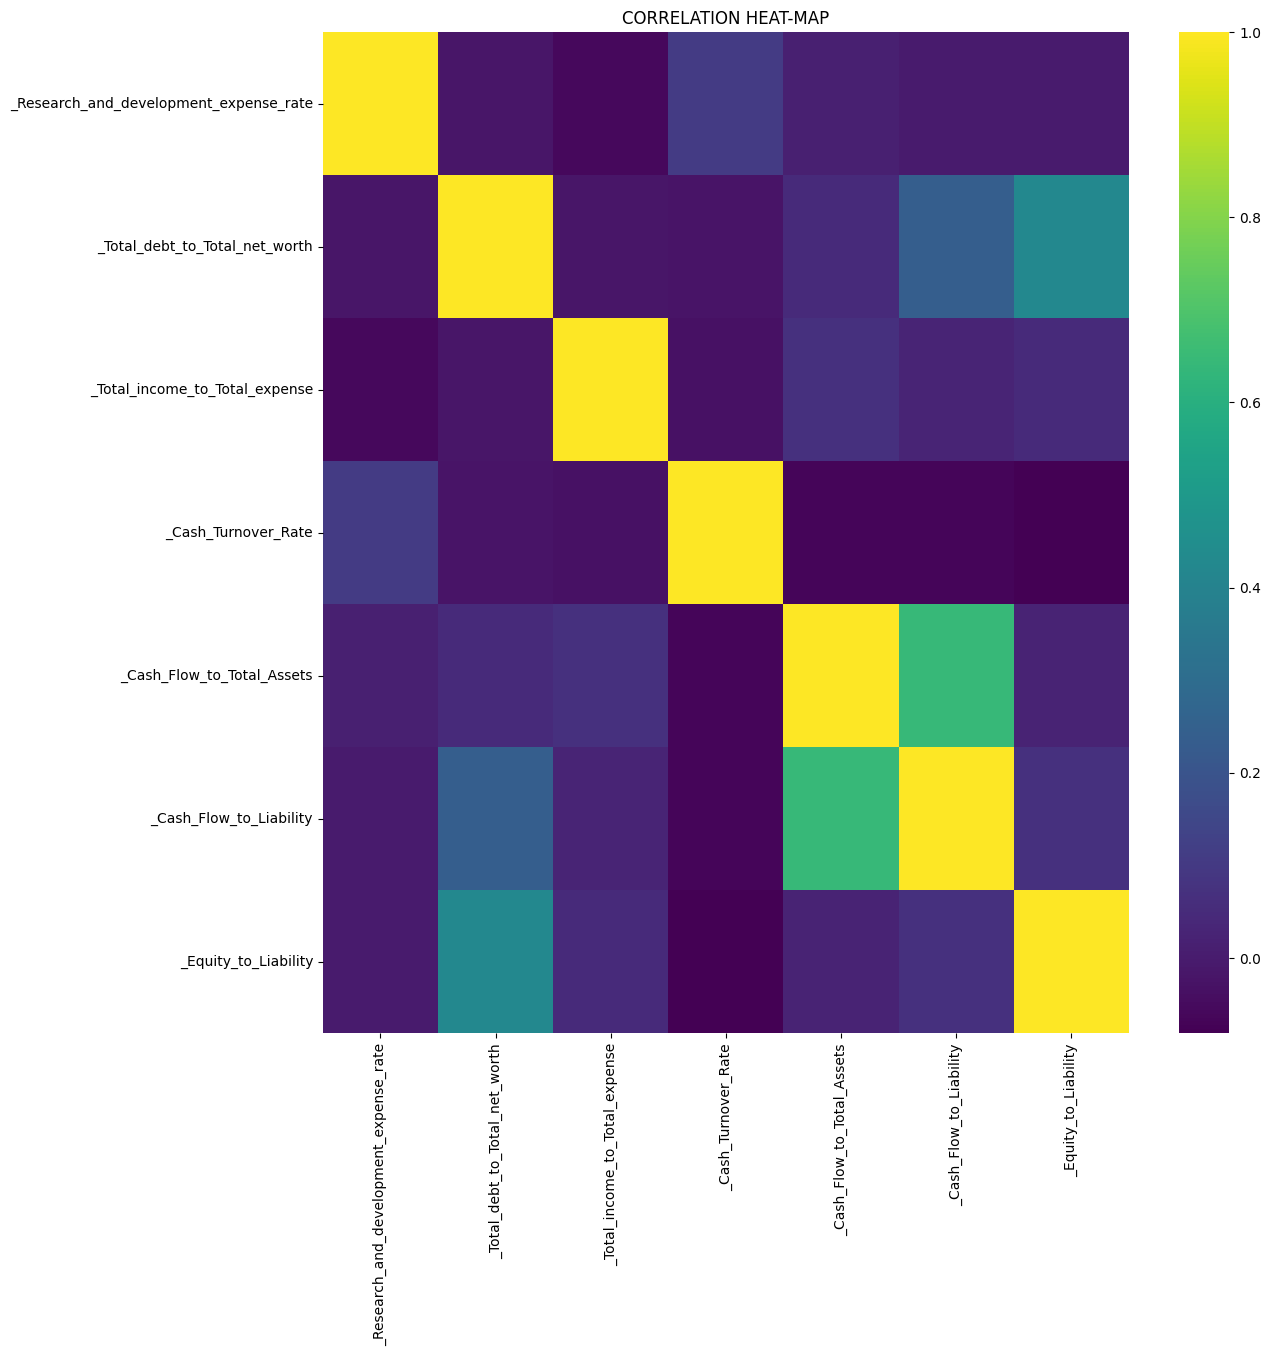

In [ ]:
##
## again the heatmap

plt.figure(figsize = (13, 13))
sns.heatmap(comp2_reduced.corr(), cmap = 'viridis')
plt.title('CORRELATION HEAT-MAP')
plt.show()


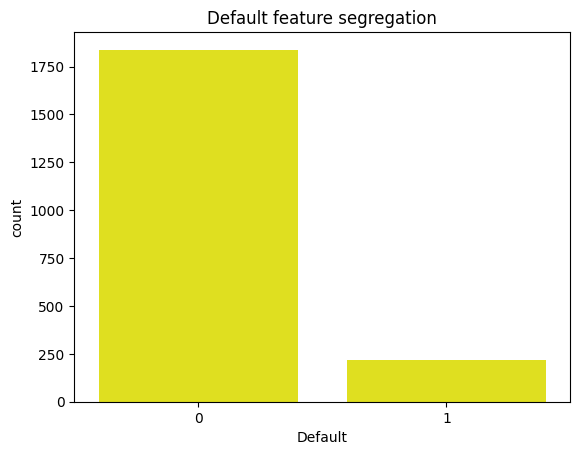

In [ ]:
##
## bar plot of the default feature

sns.countplot(data = comp2, x = 'Default', color = 'yellow')
plt.title('Default feature segregation')
plt.show()

## Modelling

### Train and test split

In [ ]:
##
## train and test split


from sklearn.model_selection import train_test_split


X = comp2.drop('Default', axis = 1)
y = comp2['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)



In [ ]:
##
##

print(X_train.shape)
print(X_test.shape)


(1378, 50)
(680, 50)


### Z_sore scaling

In [ ]:
##
## scaling the model using z_score method

from sklearn.preprocessing import  StandardScaler

## initialize the scaler
z_scaler = StandardScaler()

## Fit the data
z_scaler.fit(X_train)

## lets transform the dataset
X_train_scaled = z_scaler.transform(X_train)
X_test_scaled = z_scaler.transform(X_test)

In [ ]:
##
##

print(X_train_scaled)

[[-0.63422648  3.62149092 -0.08879673 ... -0.05441691  0.09481962
  -0.34419242]
 [-0.63422648 -0.55603441  1.50377842 ... -0.07900847 -0.00572781
   1.31947984]
 [-0.63422648 -0.55603441  0.70538539 ... -0.07631581  0.00869627
   0.22218755]
 ...
 [-0.63422648  2.57132675 -0.23561795 ... -0.26914523  0.58261537
  -0.34077838]
 [ 1.48378153 -0.55603441 -0.00689407 ... -0.07553927  0.01265423
  -0.26849171]
 [-0.63422648  0.29057371  0.27208031 ... -0.07896762 -0.00550038
   0.29967187]]


### Logistic regression

In [ ]:
##
##

import statsmodels.api as sm

## adding the intercept
X_train_scaled_sm = sm.add_constant(X_train_scaled)


## Initialize and fit
logreg = sm.Logit(y_train, X_train_scaled_sm).fit()


## the model summary
print(logreg.summary())


## adding intercept to the test dataset too
X_test_scaled_sm = sm.add_constant(X_test_scaled)


## making the predictions
predictions = logreg.predict(X_test_scaled_sm)


## binary predictions
predictions_binary = [1 if x > 0.5 else 0 for x in predictions]



         Current function value: 0.193827
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1327
Method:                           MLE   Df Model:                           50
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.4441
Time:                        16:36:41   Log-Likelihood:                -267.09
converged:                      False   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.122e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6408   1780.489     -0.004      0.997   -3496.336    3483.054
x1             0.1295      0.126      1.026      0.305      -0.11

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [ ]:
##
##

from sklearn.metrics import accuracy_score, confusion_matrix

## accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions_binary)
print(f"Confusion Matrix : \n {conf_matrix}")



Acuracy : 0.9014705882352941
Confusion Matrix : 
 [[590  23]
 [ 44  23]]


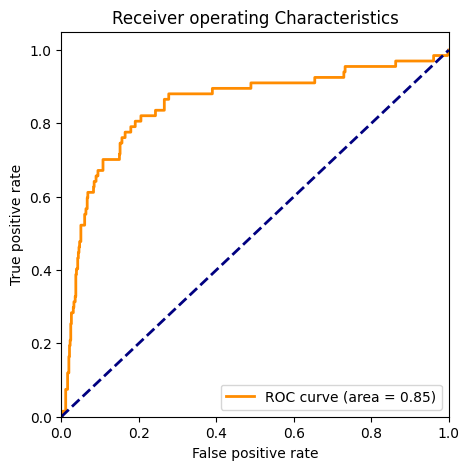

In [ ]:
##
## the roc curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
##
## lets set the cut-off at 0.3 and see how the values measure up

predictions_binary = [1 if x > 0.3 else 0 for x in predictions]


## accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions_binary)
print(f"Confusion Matrix : \n {conf_matrix}")


Acuracy : 0.9
Confusion Matrix : 
 [[571  42]
 [ 26  41]]


In [ ]:
##
## lets set the cut-off at 0.4 and see how the values measure up

predictions_binary = [1 if x > 0.4 else 0 for x in predictions]


## accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions_binary)
print(f"Confusion Matrix : \n {conf_matrix}")


Acuracy : 0.9044117647058824
Confusion Matrix : 
 [[583  30]
 [ 35  32]]


In [ ]:
##
## using p-value as the base we will filter out the complex columns and see how the model is performing.


X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X.columns)
selected_column_indices = [1, 16, 34, 38, 40, 41, 49]
X_train_reduced_scaled = X_train_scaled_df.iloc[:, selected_column_indices]
X_train_reduced_scaled_np = X_train_reduced_scaled.values

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X.columns)
selected_column_indices = [1, 16, 34, 38, 40, 41, 49]
X_test_reduced_scaled = X_test_scaled_df.iloc[:, selected_column_indices]
X_test_reduced_scaled_np = X_test_reduced_scaled.values



In [ ]:
##
##
X_train_reduced_scaled.head()

_Research_and_development_expense_rate  _Total_debt_to_Total_net_worth  \
0                                3.621491                         -0.0375   
1                               -0.556034                         -0.0375   
2                               -0.556034                         -0.0375   
3                                1.044656                         -0.0375   
4                               -0.556034                         -0.0375   

   _Total_income_to_Total_expense  _Cash_Turnover_Rate  \
0                       -0.142716            -0.143520   
1                        0.830349            -0.930706   
2                       -0.198364             0.229174   
3                        0.211690            -0.930706   
4                        0.290904            -0.502282   

   _Cash_Flow_to_Total_Assets  _Cash_Flow_to_Liability  _Equity_to_Liability  
0                   -0.171677                -0.048510             -0.344192  
1                    3.384286                 3.438536              1.319480  
2                   -0.750749                -0.360015              0.222188  
3                    1.247947                 0.257843             -0.325925  
4                   -0.514060                -0.403181              0.923330

In [ ]:
##
## now lets run the model

## adding the intercept
X_train_reduced_sm = sm.add_constant(X_train_reduced_scaled_np)


## Initialize and fit
logreg = sm.Logit(y_train, X_train_reduced_sm).fit()


## the model summary
print(logreg.summary())


## adding intercept to the test dataset too
X_test_reduced_sm = sm.add_constant(X_test_reduced_scaled_np)


## making the predictions
predictions = logreg.predict(X_test_reduced_sm)


## binary predictions
predictions_binary = [1 if x > 0.5 else 0 for x in predictions]


## the model has converged here, which is a good thing.

Optimization terminated successfully.
         Current function value: 0.224431
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            7
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.3563
Time:                        16:36:41   Log-Likelihood:                -309.27
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 5.249e-70
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7443      0.327    -14.513      0.000      -5.385      -4.104
x1             0.3292      0

In [ ]:
##
##

from sklearn.metrics import accuracy_score, confusion_matrix

## accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions_binary)
print(f"Confusion Matrix : \n {conf_matrix}")


## my accuracy has taken a slight hit, and we also see an improvement in determining what is what.
## this is good but in terms of risk analysis we are okay to have some false alarms rather than being too specific.
## with the reduced feature model we have sacrifced sensitivity to specificity



Acuracy : 0.8897058823529411
Confusion Matrix : 
 [[589  24]
 [ 51  16]]


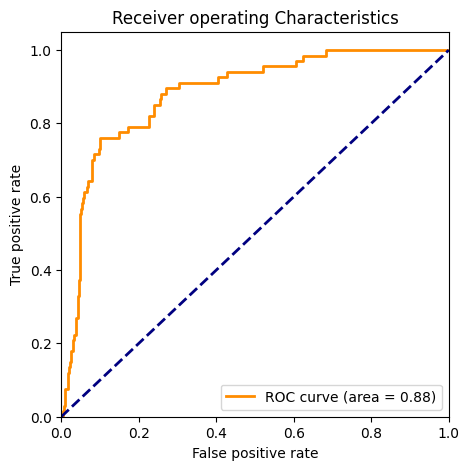

In [ ]:
##
## the roc curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
##
## lets set the cut-off at 0.3 and see how the values measure up

predictions_binary = [1 if x > 0.3 else 0 for x in predictions]


## accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions_binary)
print(f"Confusion Matrix : \n {conf_matrix}")


Acuracy : 0.9088235294117647
Confusion Matrix : 
 [[577  36]
 [ 26  41]]


In [ ]:
##
## lets set the cut-off at 0.4 and see how the values measure up

predictions_binary = [1 if x > 0.4 else 0 for x in predictions]


## accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions_binary)
print(f"Confusion Matrix : \n {conf_matrix}")


Acuracy : 0.8970588235294118
Confusion Matrix : 
 [[584  29]
 [ 41  26]]


### Random forest

Acuracy : 0.9176470588235294
Confusion Matrix : 
 [[599  14]
 [ 42  25]]
Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       613
           1       0.64      0.37      0.47        67

    accuracy                           0.92       680
   macro avg       0.79      0.68      0.71       680
weighted avg       0.91      0.92      0.91       680

Feature importances : 
 [0.01139049 0.01794858 0.01399066 0.01280233 0.00750536 0.01382746
 0.01274101 0.0119268  0.01633425 0.01306667 0.07330218 0.01672848
 0.01250376 0.02342037 0.02210927 0.03630667 0.03957989 0.0153316
 0.06350851 0.01259244 0.01661812 0.01396803 0.01074971 0.01669496
 0.01267433 0.02037721 0.01314173 0.01132691 0.01570921 0.015914
 0.01982135 0.03202965 0.01304445 0.01010457 0.05992857 0.01444339
 0.01129408 0.01109983 0.01310928 0.01267149 0.01063053 0.01005217
 0.01345841 0.01186077 0.02349946 0.01405943 0.01559625 0.03716388
 0.03601473 0.036

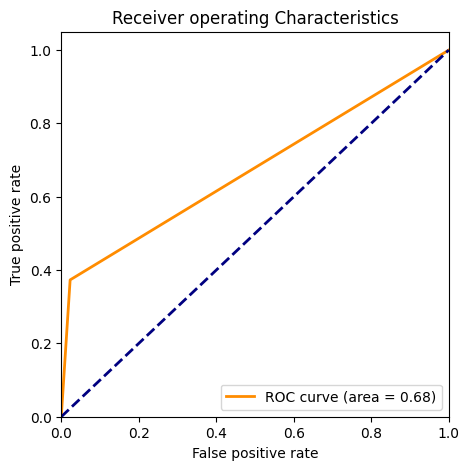

In [ ]:
##
## before and without grid_search

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## initialize the model
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)

## train the model
rf_model.fit(X_train, y_train)

## predictions
predictions = rf_model.predict(X_test)

## model evaluations
## accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions)
print(f"Confusion Matrix : \n {conf_matrix}")

## classification report
classify_report = classification_report(y_test, predictions)
print(f"Classification report : \n {classify_report}")


## feature importances
importances = rf_model.feature_importances_
print('Feature importances : \n', importances)



## roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
##
## grid search


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [1000],
    'max_depth': [None, 10, 20, 30]
}


rf_model = RandomForestClassifier()
grid_search_rf_model = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search_rf_model.fit(X_train, y_train)

## best parameters and score
print('Best Parameters:', grid_search_rf_model.best_params_)
print('Best Score:', grid_search_rf_model.best_score_)



Best Parameters: {'max_depth': None, 'n_estimators': 1000}
Best Score: 0.9187351778656125


Acuracy : 0.9176470588235294
Confusion Matrix : 
 [[599  14]
 [ 42  25]]
Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       613
           1       0.64      0.37      0.47        67

    accuracy                           0.92       680
   macro avg       0.79      0.68      0.71       680
weighted avg       0.91      0.92      0.91       680

Feature importances : 
 [0.01139049 0.01794858 0.01399066 0.01280233 0.00750536 0.01382746
 0.01274101 0.0119268  0.01633425 0.01306667 0.07330218 0.01672848
 0.01250376 0.02342037 0.02210927 0.03630667 0.03957989 0.0153316
 0.06350851 0.01259244 0.01661812 0.01396803 0.01074971 0.01669496
 0.01267433 0.02037721 0.01314173 0.01132691 0.01570921 0.015914
 0.01982135 0.03202965 0.01304445 0.01010457 0.05992857 0.01444339
 0.01129408 0.01109983 0.01310928 0.01267149 0.01063053 0.01005217
 0.01345841 0.01186077 0.02349946 0.01405943 0.01559625 0.03716388
 0.03601473 0.036

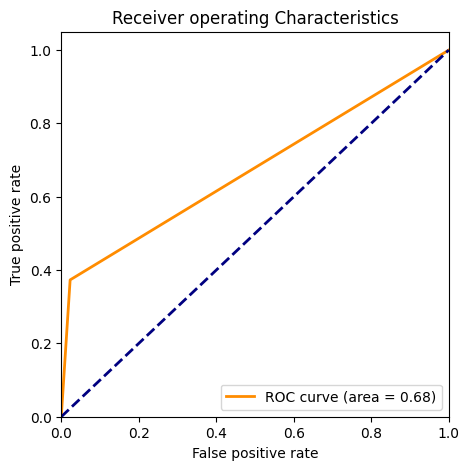

In [ ]:
##
## using grid_search's best choice


## initialize the model
rf_model = RandomForestClassifier(n_estimators = 1000, max_depth = 30, random_state = 42)

## train the model
rf_model.fit(X_train, y_train)

## predictions
predictions = rf_model.predict(X_test)

## model evaluations
## accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions)
print(f"Confusion Matrix : \n {conf_matrix}")

## classification report
classify_report = classification_report(y_test, predictions)
print(f"Classification report : \n {classify_report}")


## feature importances
importances = rf_model.feature_importances_
print('Feature importances : \n', importances)



## roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

Acuracy : 0.9073529411764706
Confusion Matrix : 
 [[594  19]
 [ 44  23]]
Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       613
           1       0.55      0.34      0.42        67

    accuracy                           0.91       680
   macro avg       0.74      0.66      0.69       680
weighted avg       0.89      0.91      0.90       680

Feature importances : 
 [0.09574174 0.16071302 0.2811953  0.10081208 0.10120253 0.10226293
 0.1580724 ]


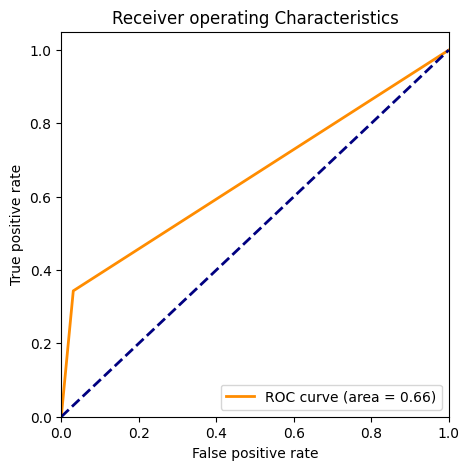

In [ ]:
##
## but with reduced features and before grid_search

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


## lets prepare the reduced dataframes
selected_column_indices = [1, 16, 34, 38, 40, 41, 49]
X_train_reduced = X_train.iloc[:, selected_column_indices]
X_test_reduced = X_test.iloc[:, selected_column_indices]


## initialize the model
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)

## train the model
rf_model.fit(X_train_reduced, y_train)

## predictions
predictions = rf_model.predict(X_test_reduced)

## model evaluations
## accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions)
print(f"Confusion Matrix : \n {conf_matrix}")

## classification report
classify_report = classification_report(y_test, predictions)
print(f"Classification report : \n {classify_report}")


## feature importances
importances = rf_model.feature_importances_
print('Feature importances : \n', importances)



## roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
##
## grid search


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [1000],
    'max_depth': [None, 10, 20, 30]
}


rf_model = RandomForestClassifier()
grid_search_rf_model = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search_rf_model.fit(X_train_reduced, y_train)

## best parameters and score
print('Best Parameters:', grid_search_rf_model.best_params_)
print('Best Score:', grid_search_rf_model.best_score_)



Best Parameters: {'max_depth': 30, 'n_estimators': 1000}
Best Score: 0.9107430830039526


Acuracy : 0.9102941176470588
Confusion Matrix : 
 [[596  17]
 [ 44  23]]
Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       613
           1       0.57      0.34      0.43        67

    accuracy                           0.91       680
   macro avg       0.75      0.66      0.69       680
weighted avg       0.90      0.91      0.90       680

Feature importances : 
 [0.09698575 0.15925453 0.29265126 0.09750183 0.09604861 0.09722709
 0.16033094]


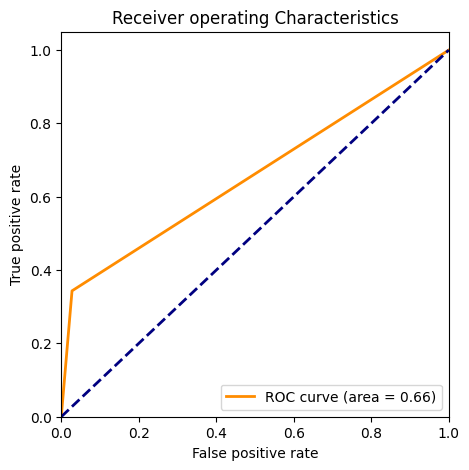

In [ ]:
##
## using grid_search's best choice


## initialize the model
rf_model = RandomForestClassifier(n_estimators = 1000, max_depth = 10, random_state = 42)

## train the model
rf_model.fit(X_train_reduced, y_train)

## predictions
predictions = rf_model.predict(X_test_reduced)

## model evaluations
## accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions)
print(f"Confusion Matrix : \n {conf_matrix}")

## classification report
classify_report = classification_report(y_test, predictions)
print(f"Classification report : \n {classify_report}")


## feature importances
importances = rf_model.feature_importances_
print('Feature importances : \n', importances)



## roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

### Linear Discriminant analysis

Acuracy : 0.8867647058823529
Confusion Matrix : 
 [[588  25]
 [ 52  15]]
Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       613
           1       0.38      0.22      0.28        67

    accuracy                           0.89       680
   macro avg       0.65      0.59      0.61       680
weighted avg       0.87      0.89      0.87       680



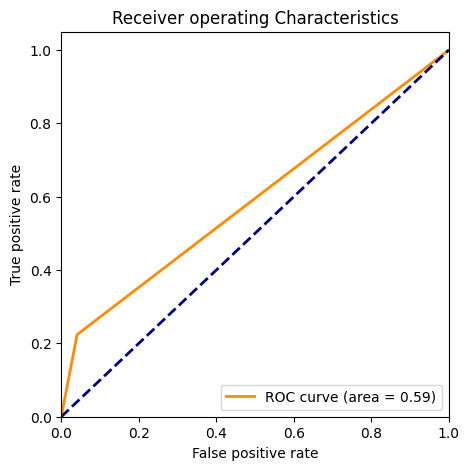

In [ ]:
##
## before grid_search

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## initialize the model
lda_model = LinearDiscriminantAnalysis()

## train the model
lda_model.fit(X_train, y_train)


## predictiosn
predictions = lda_model.predict(X_test)

## model evaluations
## accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions)
print(f"Confusion Matrix : \n {conf_matrix}")

## classification report
classify_report = classification_report(y_test, predictions)
print(f"Classification report : \n {classify_report}")


## roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()


## model performance is not better, like logistic regression it is sacrificing sensitivity for specificity

In [ ]:
##
## grid search cv


param_grid = {
    'solver' : ['svd', 'lsqr', 'eigen'],
    'shrinkage' : [None, 'auto', 0.1, 0.5, 0.9]
}


lda_model = LinearDiscriminantAnalysis()
grid_search_lda_model = GridSearchCV(estimator = lda_model, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search_lda_model.fit(X_train, y_train)

## best parameters and score
print('Best Parameters:', grid_search_lda_model.best_params_)
print('Best Score:', grid_search_lda_model.best_score_)

Best Parameters: {'shrinkage': 'auto', 'solver': 'eigen'}
Best Score: 0.894764163372859


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/

Acuracy : 0.8985294117647059
Confusion Matrix : 
 [[588  25]
 [ 44  23]]
Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       613
           1       0.48      0.34      0.40        67

    accuracy                           0.90       680
   macro avg       0.70      0.65      0.67       680
weighted avg       0.89      0.90      0.89       680



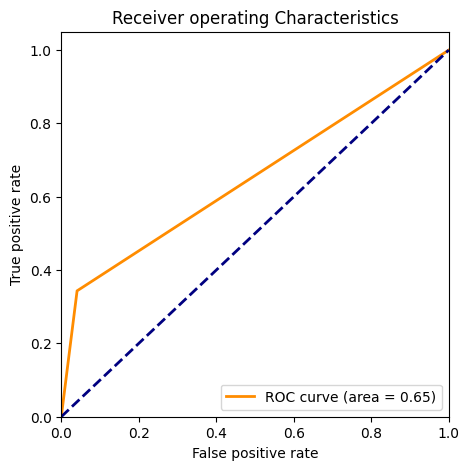

In [ ]:
##
## grid search cv's best

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## initialize the model
lda_model = LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'eigen')

## train the model
lda_model.fit(X_train, y_train)


## predictiosn
predictions = lda_model.predict(X_test)

## model evaluations
## accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions)
print(f"Confusion Matrix : \n {conf_matrix}")

## classification report
classify_report = classification_report(y_test, predictions)
print(f"Classification report : \n {classify_report}")


## roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

Acuracy : 0.9014705882352941
Confusion Matrix : 
 [[612   1]
 [ 66   1]]
Classification report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       613
           1       0.50      0.01      0.03        67

    accuracy                           0.90       680
   macro avg       0.70      0.51      0.49       680
weighted avg       0.86      0.90      0.86       680

Feature importances : 
 [0.09698575 0.15925453 0.29265126 0.09750183 0.09604861 0.09722709
 0.16033094]


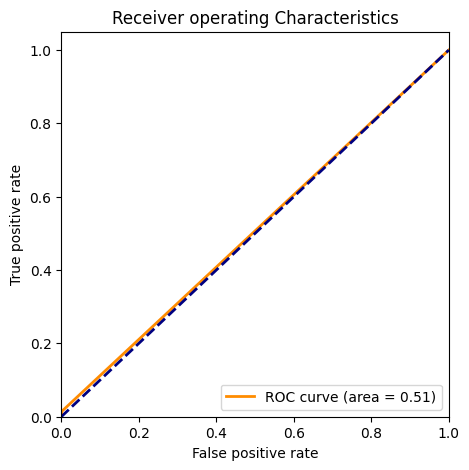

In [ ]:
##
## but with reduced features and before grid_search

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


## lets prepare the reduced dataframes
selected_column_indices = [1, 16, 34, 38, 40, 41, 49]
X_train_reduced = X_train.iloc[:, selected_column_indices]
X_test_reduced = X_test.iloc[:, selected_column_indices]


## initialize the model
lda_model = LinearDiscriminantAnalysis()

## train the model
lda_model.fit(X_train_reduced, y_train)


## predictiosn
predictions = lda_model.predict(X_test_reduced)


## model evaluations
## accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions)
print(f"Confusion Matrix : \n {conf_matrix}")

## classification report
classify_report = classification_report(y_test, predictions)
print(f"Classification report : \n {classify_report}")


## feature importances
importances = rf_model.feature_importances_
print('Feature importances : \n', importances)



## roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
##
## grid search



param_grid = {
    'solver' : ['svd', 'lsqr', 'eigen'],
    'shrinkage' : [None, 'auto', 0.1, 0.5, 0.9]
}


lda_model = LinearDiscriminantAnalysis()
grid_search_lda_model = GridSearchCV(estimator = lda_model, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search_lda_model.fit(X_train_reduced, y_train)

## best parameters and score
print('Best Parameters:', grid_search_lda_model.best_params_)
print('Best Score:', grid_search_lda_model.best_score_)



Best Parameters: {'shrinkage': 0.1, 'solver': 'lsqr'}
Best Score: 0.88897233201581


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acuracy : 0.9014705882352941
Confusion Matrix : 
 [[613   0]
 [ 67   0]]
Classification report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       613
           1       0.00      0.00      0.00        67

    accuracy                           0.90       680
   macro avg       0.45      0.50      0.47       680
weighted avg       0.81      0.90      0.85       680

Feature importances : 
 [0.09698575 0.15925453 0.29265126 0.09750183 0.09604861 0.09722709
 0.16033094]


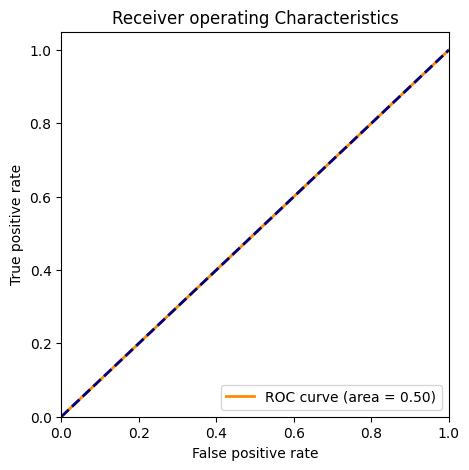

In [ ]:
##
## using grid_search's best choice


## initialize the model
lda_model = LinearDiscriminantAnalysis(shrinkage = 0.1, solver = 'lsqr')

## train the model
lda_model.fit(X_train_reduced, y_train)


## predictiosn
predictions = lda_model.predict(X_test_reduced)

## model evaluations
## accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Acuracy : {accuracy}")


## confusion matrix
conf_matrix= confusion_matrix(y_test, predictions)
print(f"Confusion Matrix : \n {conf_matrix}")

## classification report
classify_report = classification_report(y_test, predictions)
print(f"Classification report : \n {classify_report}")


## feature importances
importances = rf_model.feature_importances_
print('Feature importances : \n', importances)



## roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()


## grid search best has given up on positive class and only did negative class.
## this is a good thing if we are aiming only for negative class.
## what can be done is, we can create another model that specifically looks for positive class
## combining them can give us a model that works for both